In [1]:
import numpy as np
import scipy
import scipy.io as io
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import primal_dual
from pdastf.pdas import trendfilter as tf 

# Prepare Data

In [2]:
# Load Data
stim = scipy.io.loadmat("./data/sampleMovie.mat")['stimulationSignal'][1:-50].squeeze()
data = io.loadmat("./data/post_demix.mat")
N, T = data['C'].shape
signals = data['C']

In [3]:
import preprocess

In [4]:
signals, trends, stim, disc_idx = preprocess.detrend(signals, stim, disc_idx=np.array([5]))

In [5]:
T = len(stim)

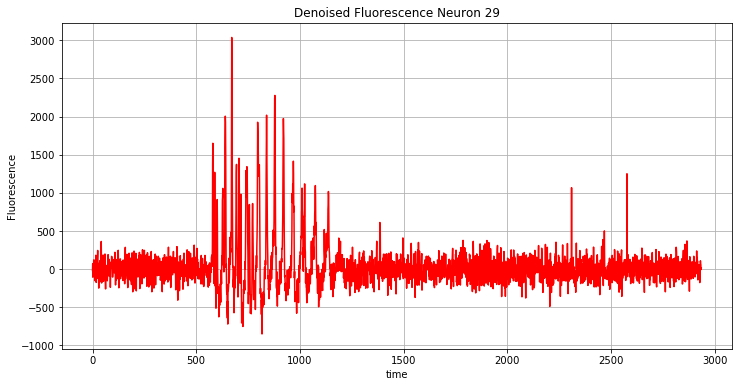

In [6]:
idx = np.random.randint(0, N)
signal = signals[idx,:]
#trend_filtered = tfd.constrained_l1tf(signal)[0]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(T), signal, 'r')
#ax.plot(np.arange(T), trend_filtered, 'b')

ax.set(xlabel='time', ylabel='Fluorescence',
       title='Denoised Fluorescence Neuron {}'.format(idx))
ax.grid()

plt.show()

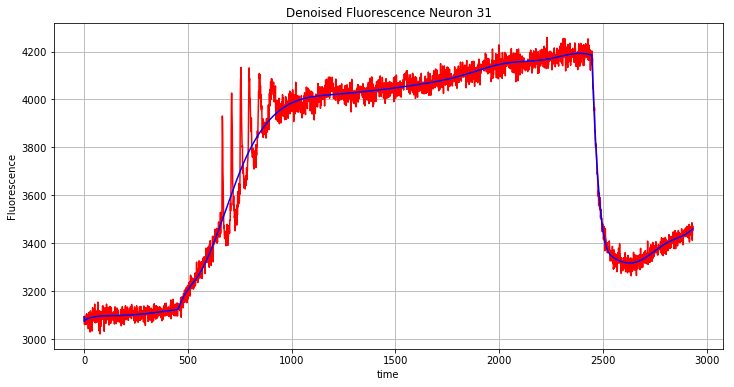

In [7]:
idx = np.random.randint(0, N)
signal = signals[idx,:]
#trend_filtered = tfd.constrained_l1tf(signal)[0]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(T), signal+trends[idx,:], 'r')
ax.plot(np.arange(T), trends[idx,:], 'b')

ax.set(xlabel='time', ylabel='Fluorescence',
       title='Denoised Fluorescence Neuron {}'.format(idx))
ax.grid()

plt.show()

# Evaluate Solvers

### Demonstrate And Test Safeguarding

In [8]:
lams = [1000, 500, 250, 125, 75, 45, 27, 18, 12, 8]

In [383]:
primal, dual, results, conv =  primal_dual.lagrangian_l1tf(signal,
                                                           lams[0],
                                                           solver="active set",
                                                           warm_start=None,
                                                           verbose=True,
                                                           record=True,
                                                           safeguard=True)

||Iter:    1|| |V|: 2662|| |A|:    0||p: 1.000e+00||CPU: 5.701e-04||
[[ 0.  0.  1. ...,  1.  1.  1.]
 [ 0. -4. -4. ..., -4. -4. -4.]
 [ 6.  6.  6. ...,  6.  6.  6.]]
||Iter:    2|| |V|: 2431|| |A|: 2662||p: 1.000e+00||CPU: 4.441e-03||
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 6.  6.  6. ...,  6.  6.  6.]]
||Iter:    3|| |V|: 1288|| |A|:  443||p: 1.000e+00||CPU: 8.082e-03||
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ..., -4.  1.  1.]
 [ 6.  6.  6. ...,  6.  6.  6.]]
||Iter:    4|| |V|:  927|| |A|: 1573||p: 1.000e+00||CPU: 1.165e-02||
[[ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  1. -4. ..., -4. -4.  1.]
 [ 6.  6.  6. ...,  6.  6.  6.]]
||Iter:    5|| |V|:  807|| |A|: 1816||p: 1.000e+00||CPU: 1.467e-02||
[[ 0.  0.  1. ...,  1.  1.  1.]
 [ 0. -4. -4. ..., -4. -4. -4.]
 [ 6.  6.  6. ...,  6.  6.  6.]]
||Iter:    6|| |V|:  658|| |A|: 1809||p: 1.000e+00||CPU: 1.793e-02||
[[ 0.  0.  1. ...,  1.  1.  1.]
 [ 0. -4. -4. ..., -4. -4. -4.]
 [ 6.  6.  6. ...,  6.  6.  6.]]
||It

[[ 0.  0.  1. ...,  0.  1.  1.]
 [ 0. -4. -4. ..., -4. -4. -4.]
 [ 6.  6.  6. ...,  6.  6.  6.]]
||Iter:   51|| |V|:   17|| |A|: 1868||p: 9.801e-01||CPU: 2.191e-01||
[[ 0.  0.  1. ...,  0.  1.  1.]
 [ 0. -4. -4. ..., -4. -4. -4.]
 [ 6.  6.  6. ...,  6.  6.  6.]]
||Iter:   52|| |V|:   16|| |A|: 1873||p: 9.801e-01||CPU: 2.225e-01||
[[ 0.  0.  1. ...,  0.  1.  1.]
 [ 0. -4. -4. ..., -4. -4. -4.]
 [ 6.  6.  6. ...,  6.  6.  6.]]
||Iter:   53|| |V|:   12|| |A|: 1869||p: 1.000e+00||CPU: 2.258e-01||
[[ 0.  0.  1. ...,  0.  1.  1.]
 [ 0. -4. -4. ..., -4. -4. -4.]
 [ 6.  6.  6. ...,  6.  6.  6.]]
||Iter:   54|| |V|:   17|| |A|: 1877||p: 1.000e+00||CPU: 2.315e-01||
[[ 0.  0.  1. ...,  0.  1.  1.]
 [ 0. -4. -4. ..., -4. -4. -4.]
 [ 6.  6.  6. ...,  6.  6.  6.]]
||Iter:   55|| |V|:   15|| |A|: 1866||p: 1.000e+00||CPU: 2.367e-01||
[[ 0.  0.  1. ...,  0.  1.  1.]
 [ 0. -4. -4. ..., -4. -4. -4.]
 [ 6.  6.  6. ...,  6.  6.  6.]]
||Iter:   56|| |V|:   17|| |A|: 1875||p: 9.000e-01||CPU: 2.435e-01||
[[ 0

In [ ]:
signal = signals[idx,:]
#trend_filtered = tfd.constrained_l1tf(signal)[0]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(T), signal, 'r')
ax.plot(np.arange(T), primal[:T], 'b')

ax.set(xlabel='time', ylabel='Fluorescence',
       title='Denoised Fluorescence Neuron {}'.format(idx))
ax.grid()

plt.show()

In [367]:
primal, dual, results, conv =  primal_dual.lagrangian_l1tf(signal,
                                                           lams[-1],
                                                           solver="first order",
                                                           tol=1e-2,
                                                           verbose=True,
                                                           record=True)

||Iter:1||Obj: 7.001e+01||Dual: 3.439e+01||Gap: 3.563e+01||Delta Obj:       inf||Delta x: 1.665e+02||Delta y: 0.000e+00||CPU: 1.050e-03||
||Iter:2||Obj: 6.993e+01||Dual: 3.441e+01||Gap: 3.552e+01||Delta Obj:       inf||Delta x: 1.665e+02||Delta y: 5.572e-01||CPU: 3.462e-03||
||Iter:3||Obj: 6.984e+01||Dual: 3.450e+01||Gap: 3.534e+01||Delta Obj:       inf||Delta x: 1.665e+02||Delta y: 2.749e+00||CPU: 5.159e-03||
||Iter:4||Obj: 6.975e+01||Dual: 3.456e+01||Gap: 3.519e+01||Delta Obj:       inf||Delta x: 1.665e+02||Delta y: 2.301e+01||CPU: 6.967e-03||
||Iter:5||Obj: 6.966e+01||Dual: 3.456e+01||Gap: 3.510e+01||Delta Obj: 5.035e-03||Delta x: 1.665e+02||Delta y: 2.301e+01||CPU: 8.572e-03||
||Iter:6||Obj: 6.958e+01||Dual: 3.458e+01||Gap: 3.499e+01||Delta Obj: 5.024e-03||Delta x: 8.298e+00||Delta y: 2.301e+01||CPU: 1.012e-02||
||Iter:7||Obj: 6.949e+01||Dual: 3.464e+01||Gap: 3.484e+01||Delta Obj: 5.011e-03||Delta x: 7.017e+00||Delta y: 2.301e+01||CPU: 1.198e-02||
||Iter:8||Obj: 6.940e+01||Dual: 3.

||Iter:61||Obj: 6.523e+01||Dual: 3.654e+01||Gap: 2.869e+01||Delta Obj: 4.369e-03||Delta x: 8.651e+00||Delta y: 4.531e+02||CPU: 1.465e-01||
||Iter:62||Obj: 6.516e+01||Dual: 3.656e+01||Gap: 2.860e+01||Delta Obj: 4.357e-03||Delta x: 6.058e+00||Delta y: 4.531e+02||CPU: 1.492e-01||
||Iter:63||Obj: 6.509e+01||Dual: 3.656e+01||Gap: 2.853e+01||Delta Obj: 4.347e-03||Delta x: 6.058e+00||Delta y: 1.278e+02||CPU: 1.519e-01||
||Iter:64||Obj: 6.502e+01||Dual: 3.657e+01||Gap: 2.845e+01||Delta Obj: 4.337e-03||Delta x: 6.058e+00||Delta y: 1.278e+02||CPU: 1.544e-01||
||Iter:65||Obj: 6.495e+01||Dual: 3.661e+01||Gap: 2.834e+01||Delta Obj: 4.328e-03||Delta x: 4.742e+00||Delta y: 1.278e+02||CPU: 1.570e-01||
||Iter:66||Obj: 6.488e+01||Dual: 3.663e+01||Gap: 2.825e+01||Delta Obj: 4.316e-03||Delta x: 1.376e+01||Delta y: 1.958e+02||CPU: 1.593e-01||
||Iter:67||Obj: 6.481e+01||Dual: 3.663e+01||Gap: 2.818e+01||Delta Obj: 4.308e-03||Delta x: 1.376e+01||Delta y: 1.958e+02||CPU: 1.617e-01||
||Iter:68||Obj: 6.474e+01||

/Users/ikinsella/devel/voltagedenoising/primal_dual.py:317: RuntimeWarning: divide by zero encountered in true_divide
  # Evaluate Progress


||Iter:86||Obj: 6.352e+01||Dual: 3.705e+01||Gap: 2.647e+01||Delta Obj: 4.124e-03||Delta x: 2.631e+01||Delta y: 3.496e+02||CPU: 2.018e-01||
||Iter:87||Obj: 6.346e+01||Dual: 3.703e+01||Gap: 2.642e+01||Delta Obj: 4.118e-03||Delta x: 2.631e+01||Delta y: 3.496e+02||CPU: 2.045e-01||
||Iter:88||Obj: 6.339e+01||Dual: 3.704e+01||Gap: 2.635e+01||Delta Obj: 4.107e-03||Delta x: 2.631e+01||Delta y: 3.496e+02||CPU: 2.084e-01||
||Iter:89||Obj: 6.333e+01||Dual: 3.709e+01||Gap: 2.623e+01||Delta Obj: 4.097e-03||Delta x: 2.631e+01||Delta y: 1.872e+02||CPU: 2.145e-01||
||Iter:90||Obj: 6.326e+01||Dual: 3.713e+01||Gap: 2.613e+01||Delta Obj: 4.087e-03||Delta x: 2.066e+01||Delta y: 1.864e+02||CPU: 2.178e-01||
||Iter:91||Obj: 6.320e+01||Dual: 3.712e+01||Gap: 2.608e+01||Delta Obj: 4.078e-03||Delta x: 2.066e+01||Delta y: 1.864e+02||CPU: 2.223e-01||
||Iter:92||Obj: 6.313e+01||Dual: 3.709e+01||Gap: 2.604e+01||Delta Obj: 4.075e-03||Delta x: 2.066e+01||Delta y: 6.906e+01||CPU: 2.249e-01||
||Iter:93||Obj: 6.307e+01||

||Iter:145||Obj: 6.000e+01||Dual: 3.790e+01||Gap: 2.210e+01||Delta Obj: 3.626e-03||Delta x: 1.194e+01||Delta y: 2.344e+02||CPU: 3.519e-01||
||Iter:146||Obj: 5.994e+01||Dual: 3.792e+01||Gap: 2.203e+01||Delta Obj: 3.614e-03||Delta x: 5.365e+00||Delta y: 2.344e+02||CPU: 3.545e-01||
||Iter:147||Obj: 5.989e+01||Dual: 3.791e+01||Gap: 2.198e+01||Delta Obj: 3.606e-03||Delta x: 5.365e+00||Delta y: 2.476e+02||CPU: 3.566e-01||
||Iter:148||Obj: 5.983e+01||Dual: 3.790e+01||Gap: 2.193e+01||Delta Obj: 3.602e-03||Delta x: 5.365e+00||Delta y: 3.502e+02||CPU: 3.582e-01||
||Iter:149||Obj: 5.978e+01||Dual: 3.791e+01||Gap: 2.187e+01||Delta Obj: 3.589e-03||Delta x: 5.365e+00||Delta y: 3.502e+02||CPU: 3.602e-01||
||Iter:150||Obj: 5.973e+01||Dual: 3.801e+01||Gap: 2.172e+01||Delta Obj: 3.577e-03||Delta x: 7.223e+00||Delta y: 3.502e+02||CPU: 3.627e-01||
||Iter:151||Obj: 5.967e+01||Dual: 3.810e+01||Gap: 2.158e+01||Delta Obj: 3.562e-03||Delta x: 7.223e+00||Delta y: 2.678e+03||CPU: 3.648e-01||
||Iter:152||Obj: 5.9

||Iter:204||Obj: 5.713e+01||Dual: 3.936e+01||Gap: 1.777e+01||Delta Obj: 3.042e-03||Delta x: 1.001e+01||Delta y: 2.014e+02||CPU: 4.840e-01||
||Iter:205||Obj: 5.709e+01||Dual: 3.939e+01||Gap: 1.769e+01||Delta Obj: 3.031e-03||Delta x: 6.358e+01||Delta y: 2.014e+02||CPU: 4.861e-01||
||Iter:206||Obj: 5.704e+01||Dual: 3.939e+01||Gap: 1.766e+01||Delta Obj: 3.024e-03||Delta x: 6.358e+01||Delta y: 2.014e+02||CPU: 4.884e-01||
||Iter:207||Obj: 5.700e+01||Dual: 3.938e+01||Gap: 1.762e+01||Delta Obj: 3.014e-03||Delta x: 6.358e+01||Delta y: 1.916e+02||CPU: 4.905e-01||
||Iter:208||Obj: 5.696e+01||Dual: 3.941e+01||Gap: 1.755e+01||Delta Obj: 3.004e-03||Delta x: 6.358e+01||Delta y: 1.916e+02||CPU: 4.926e-01||
||Iter:209||Obj: 5.692e+01||Dual: 3.949e+01||Gap: 1.743e+01||Delta Obj: 2.990e-03||Delta x: 6.358e+01||Delta y: 1.148e+02||CPU: 4.943e-01||
||Iter:210||Obj: 5.687e+01||Dual: 3.954e+01||Gap: 1.733e+01||Delta Obj: 2.977e-03||Delta x: 1.597e+01||Delta y: 2.674e+02||CPU: 4.965e-01||
||Iter:211||Obj: 5.6

||Iter:263||Obj: 5.484e+01||Dual: 4.035e+01||Gap: 1.449e+01||Delta Obj: 2.556e-03||Delta x: 4.294e+00||Delta y: 1.155e+03||CPU: 6.200e-01||
||Iter:264||Obj: 5.481e+01||Dual: 4.035e+01||Gap: 1.446e+01||Delta Obj: 2.556e-03||Delta x: 4.294e+00||Delta y: 1.155e+03||CPU: 6.218e-01||
||Iter:265||Obj: 5.477e+01||Dual: 4.037e+01||Gap: 1.440e+01||Delta Obj: 2.549e-03||Delta x: 1.918e+00||Delta y: 1.155e+03||CPU: 6.244e-01||
||Iter:266||Obj: 5.474e+01||Dual: 4.040e+01||Gap: 1.434e+01||Delta Obj: 2.545e-03||Delta x: 3.852e+00||Delta y: 3.573e+02||CPU: 6.265e-01||
||Iter:267||Obj: 5.470e+01||Dual: 4.040e+01||Gap: 1.430e+01||Delta Obj: 2.536e-03||Delta x: 3.852e+00||Delta y: 3.573e+02||CPU: 6.287e-01||
||Iter:268||Obj: 5.467e+01||Dual: 4.041e+01||Gap: 1.426e+01||Delta Obj: 2.523e-03||Delta x: 3.852e+00||Delta y: 3.573e+02||CPU: 6.303e-01||
||Iter:269||Obj: 5.464e+01||Dual: 4.044e+01||Gap: 1.420e+01||Delta Obj: 2.514e-03||Delta x: 3.852e+00||Delta y: 3.573e+02||CPU: 6.322e-01||
||Iter:270||Obj: 5.4

||Iter:322||Obj: 5.299e+01||Dual: 4.116e+01||Gap: 1.183e+01||Delta Obj: 2.150e-03||Delta x: 7.322e+00||Delta y: 2.806e+02||CPU: 7.537e-01||
||Iter:323||Obj: 5.296e+01||Dual: 4.116e+01||Gap: 1.181e+01||Delta Obj: 2.148e-03||Delta x: 2.089e+01||Delta y: 3.583e+02||CPU: 7.560e-01||
||Iter:324||Obj: 5.293e+01||Dual: 4.116e+01||Gap: 1.178e+01||Delta Obj: 2.146e-03||Delta x: 2.089e+01||Delta y: 3.583e+02||CPU: 7.586e-01||
||Iter:325||Obj: 5.291e+01||Dual: 4.117e+01||Gap: 1.173e+01||Delta Obj: 2.142e-03||Delta x: 2.089e+01||Delta y: 3.583e+02||CPU: 7.607e-01||
||Iter:326||Obj: 5.288e+01||Dual: 4.117e+01||Gap: 1.171e+01||Delta Obj: 2.135e-03||Delta x: 2.089e+01||Delta y: 1.312e+03||CPU: 7.629e-01||
||Iter:327||Obj: 5.285e+01||Dual: 4.117e+01||Gap: 1.168e+01||Delta Obj: 2.130e-03||Delta x: 2.089e+01||Delta y: 1.312e+03||CPU: 7.650e-01||
||Iter:328||Obj: 5.282e+01||Dual: 4.117e+01||Gap: 1.165e+01||Delta Obj: 2.122e-03||Delta x: 3.818e+00||Delta y: 1.312e+03||CPU: 7.675e-01||
||Iter:329||Obj: 5.2

||Iter:381||Obj: 5.146e+01||Dual: 4.151e+01||Gap: 9.950e+00||Delta Obj: 1.839e-03||Delta x: 8.602e+00||Delta y: 1.809e+02||CPU: 8.863e-01||
||Iter:382||Obj: 5.143e+01||Dual: 4.154e+01||Gap: 9.896e+00||Delta Obj: 1.832e-03||Delta x: 8.602e+00||Delta y: 1.809e+02||CPU: 8.891e-01||
||Iter:383||Obj: 5.141e+01||Dual: 4.157e+01||Gap: 9.842e+00||Delta Obj: 1.829e-03||Delta x: 2.566e+00||Delta y: 1.809e+02||CPU: 8.921e-01||
||Iter:384||Obj: 5.139e+01||Dual: 4.158e+01||Gap: 9.807e+00||Delta Obj: 1.822e-03||Delta x: 3.240e+00||Delta y: 1.809e+02||CPU: 8.940e-01||
||Iter:385||Obj: 5.136e+01||Dual: 4.157e+01||Gap: 9.791e+00||Delta Obj: 1.822e-03||Delta x: 4.776e+00||Delta y: 1.787e+02||CPU: 8.956e-01||
||Iter:386||Obj: 5.134e+01||Dual: 4.159e+01||Gap: 9.754e+00||Delta Obj: 1.812e-03||Delta x: 4.776e+00||Delta y: 1.787e+02||CPU: 8.983e-01||
||Iter:387||Obj: 5.132e+01||Dual: 4.161e+01||Gap: 9.705e+00||Delta Obj: 1.807e-03||Delta x: 4.776e+00||Delta y: 1.787e+02||CPU: 9.008e-01||
||Iter:388||Obj: 5.1

||Iter:440||Obj: 5.019e+01||Dual: 4.188e+01||Gap: 8.310e+00||Delta Obj: 1.557e-03||Delta x: 1.589e+00||Delta y: 9.539e+02||CPU: 1.030e+00||
||Iter:441||Obj: 5.017e+01||Dual: 4.189e+01||Gap: 8.278e+00||Delta Obj: 1.554e-03||Delta x: 1.589e+00||Delta y: 9.539e+02||CPU: 1.033e+00||
||Iter:442||Obj: 5.015e+01||Dual: 4.192e+01||Gap: 8.238e+00||Delta Obj: 1.543e-03||Delta x: 1.589e+00||Delta y: 9.539e+02||CPU: 1.034e+00||
||Iter:443||Obj: 5.013e+01||Dual: 4.193e+01||Gap: 8.201e+00||Delta Obj: 1.538e-03||Delta x: 8.430e-01||Delta y: 2.521e+02||CPU: 1.036e+00||
||Iter:444||Obj: 5.011e+01||Dual: 4.193e+01||Gap: 8.181e+00||Delta Obj: 1.537e-03||Delta x: 6.301e-01||Delta y: 2.521e+02||CPU: 1.038e+00||
||Iter:445||Obj: 5.009e+01||Dual: 4.192e+01||Gap: 8.172e+00||Delta Obj: 1.538e-03||Delta x: 8.446e-01||Delta y: 2.214e+02||CPU: 1.040e+00||
||Iter:446||Obj: 5.008e+01||Dual: 4.193e+01||Gap: 8.146e+00||Delta Obj: 1.537e-03||Delta x: 1.164e+00||Delta y: 2.214e+02||CPU: 1.042e+00||
||Iter:447||Obj: 5.0

||Iter:499||Obj: 4.916e+01||Dual: 4.231e+01||Gap: 6.847e+00||Delta Obj: 1.298e-03||Delta x: 6.663e+00||Delta y: 8.087e+02||CPU: 1.158e+00||
||Iter:500||Obj: 4.914e+01||Dual: 4.230e+01||Gap: 6.843e+00||Delta Obj: 1.293e-03||Delta x: 6.663e+00||Delta y: 8.087e+02||CPU: 1.159e+00||
||Iter:501||Obj: 4.912e+01||Dual: 4.229e+01||Gap: 6.837e+00||Delta Obj: 1.292e-03||Delta x: 6.663e+00||Delta y: 8.087e+02||CPU: 1.161e+00||
||Iter:502||Obj: 4.911e+01||Dual: 4.231e+01||Gap: 6.804e+00||Delta Obj: 1.284e-03||Delta x: 1.994e+00||Delta y: 8.087e+02||CPU: 1.164e+00||
||Iter:503||Obj: 4.909e+01||Dual: 4.232e+01||Gap: 6.769e+00||Delta Obj: 1.281e-03||Delta x: 5.960e+00||Delta y: 8.067e+02||CPU: 1.167e+00||
||Iter:504||Obj: 4.908e+01||Dual: 4.232e+01||Gap: 6.759e+00||Delta Obj: 1.282e-03||Delta x: 5.960e+00||Delta y: 1.290e+03||CPU: 1.170e+00||
||Iter:505||Obj: 4.906e+01||Dual: 4.230e+01||Gap: 6.762e+00||Delta Obj: 1.278e-03||Delta x: 5.960e+00||Delta y: 1.290e+03||CPU: 1.172e+00||
||Iter:506||Obj: 4.9

||Iter:558||Obj: 4.830e+01||Dual: 4.256e+01||Gap: 5.745e+00||Delta Obj: 1.089e-03||Delta x: 3.364e+00||Delta y: 3.358e+02||CPU: 1.295e+00||
||Iter:559||Obj: 4.829e+01||Dual: 4.258e+01||Gap: 5.711e+00||Delta Obj: 1.086e-03||Delta x: 7.419e+00||Delta y: 3.358e+02||CPU: 1.297e+00||
||Iter:560||Obj: 4.828e+01||Dual: 4.256e+01||Gap: 5.713e+00||Delta Obj: 1.082e-03||Delta x: 8.645e+00||Delta y: 3.358e+02||CPU: 1.300e+00||
||Iter:561||Obj: 4.826e+01||Dual: 4.255e+01||Gap: 5.711e+00||Delta Obj: 1.079e-03||Delta x: 8.645e+00||Delta y: 4.127e+02||CPU: 1.302e+00||
||Iter:562||Obj: 4.825e+01||Dual: 4.257e+01||Gap: 5.681e+00||Delta Obj: 1.077e-03||Delta x: 9.471e+00||Delta y: 5.670e+03||CPU: 1.305e+00||
||Iter:563||Obj: 4.824e+01||Dual: 4.259e+01||Gap: 5.648e+00||Delta Obj: 1.068e-03||Delta x: 9.471e+00||Delta y: 5.670e+03||CPU: 1.308e+00||
||Iter:564||Obj: 4.823e+01||Dual: 4.260e+01||Gap: 5.630e+00||Delta Obj: 1.066e-03||Delta x: 1.229e+01||Delta y: 5.670e+03||CPU: 1.310e+00||
||Iter:565||Obj: 4.8

||Iter:617||Obj: 4.760e+01||Dual: 4.276e+01||Gap: 4.841e+00||Delta Obj: 9.179e-04||Delta x: 3.365e+00||Delta y: 1.515e+03||CPU: 1.429e+00||
||Iter:618||Obj: 4.759e+01||Dual: 4.277e+01||Gap: 4.822e+00||Delta Obj: 9.143e-04||Delta x: 3.365e+00||Delta y: 1.515e+03||CPU: 1.432e+00||
||Iter:619||Obj: 4.758e+01||Dual: 4.280e+01||Gap: 4.777e+00||Delta Obj: 9.091e-04||Delta x: 3.365e+00||Delta y: 1.515e+03||CPU: 1.434e+00||
||Iter:620||Obj: 4.757e+01||Dual: 4.282e+01||Gap: 4.753e+00||Delta Obj: 9.007e-04||Delta x: 3.365e+00||Delta y: 1.515e+03||CPU: 1.436e+00||
||Iter:621||Obj: 4.756e+01||Dual: 4.280e+01||Gap: 4.756e+00||Delta Obj: 8.973e-04||Delta x: 3.365e+00||Delta y: 2.753e+02||CPU: 1.438e+00||
||Iter:622||Obj: 4.755e+01||Dual: 4.279e+01||Gap: 4.763e+00||Delta Obj: 8.966e-04||Delta x: 3.690e+00||Delta y: 1.228e+02||CPU: 1.440e+00||
||Iter:623||Obj: 4.754e+01||Dual: 4.280e+01||Gap: 4.742e+00||Delta Obj: 8.886e-04||Delta x: 3.690e+00||Delta y: 1.248e+02||CPU: 1.442e+00||
||Iter:624||Obj: 4.7

||Iter:676||Obj: 4.703e+01||Dual: 4.301e+01||Gap: 4.016e+00||Delta Obj: 7.558e-04||Delta x: 7.411e-01||Delta y: 4.737e+02||CPU: 1.565e+00||
||Iter:677||Obj: 4.702e+01||Dual: 4.300e+01||Gap: 4.019e+00||Delta Obj: 7.546e-04||Delta x: 1.140e+00||Delta y: 4.994e+02||CPU: 1.569e+00||
||Iter:678||Obj: 4.701e+01||Dual: 4.299e+01||Gap: 4.019e+00||Delta Obj: 7.548e-04||Delta x: 5.738e+01||Delta y: 4.994e+02||CPU: 1.571e+00||
||Iter:679||Obj: 4.700e+01||Dual: 4.300e+01||Gap: 3.998e+00||Delta Obj: 7.434e-04||Delta x: 5.738e+01||Delta y: 4.994e+02||CPU: 1.574e+00||
||Iter:680||Obj: 4.699e+01||Dual: 4.303e+01||Gap: 3.965e+00||Delta Obj: 7.418e-04||Delta x: 5.738e+01||Delta y: 4.994e+02||CPU: 1.576e+00||
||Iter:681||Obj: 4.699e+01||Dual: 4.303e+01||Gap: 3.954e+00||Delta Obj: 7.363e-04||Delta x: 5.738e+01||Delta y: 4.994e+02||CPU: 1.578e+00||
||Iter:682||Obj: 4.698e+01||Dual: 4.300e+01||Gap: 3.971e+00||Delta Obj: 7.369e-04||Delta x: 5.738e+01||Delta y: 4.936e+02||CPU: 1.580e+00||
||Iter:683||Obj: 4.6

||Iter:735||Obj: 4.655e+01||Dual: 4.313e+01||Gap: 3.419e+00||Delta Obj: 6.328e-04||Delta x: 1.041e+01||Delta y: 3.102e+03||CPU: 1.717e+00||
||Iter:736||Obj: 4.655e+01||Dual: 4.315e+01||Gap: 3.397e+00||Delta Obj: 6.324e-04||Delta x: 1.041e+01||Delta y: 3.102e+03||CPU: 1.719e+00||
||Iter:737||Obj: 4.654e+01||Dual: 4.314e+01||Gap: 3.397e+00||Delta Obj: 6.286e-04||Delta x: 1.041e+01||Delta y: 3.102e+03||CPU: 1.721e+00||
||Iter:738||Obj: 4.653e+01||Dual: 4.313e+01||Gap: 3.398e+00||Delta Obj: 6.311e-04||Delta x: 1.041e+01||Delta y: 3.102e+03||CPU: 1.723e+00||
||Iter:739||Obj: 4.652e+01||Dual: 4.314e+01||Gap: 3.387e+00||Delta Obj: 6.266e-04||Delta x: 1.942e+00||Delta y: 3.763e+02||CPU: 1.725e+00||
||Iter:740||Obj: 4.652e+01||Dual: 4.315e+01||Gap: 3.371e+00||Delta Obj: 6.227e-04||Delta x: 9.078e-01||Delta y: 3.763e+02||CPU: 1.728e+00||
||Iter:741||Obj: 4.651e+01||Dual: 4.315e+01||Gap: 3.359e+00||Delta Obj: 6.203e-04||Delta x: 6.119e-01||Delta y: 3.763e+02||CPU: 1.730e+00||
||Iter:742||Obj: 4.6

||Iter:794||Obj: 4.616e+01||Dual: 4.326e+01||Gap: 2.895e+00||Delta Obj: 5.257e-04||Delta x: 9.101e-01||Delta y: 1.042e+03||CPU: 1.847e+00||
||Iter:795||Obj: 4.615e+01||Dual: 4.327e+01||Gap: 2.883e+00||Delta Obj: 5.257e-04||Delta x: 7.358e-01||Delta y: 1.042e+03||CPU: 1.850e+00||
||Iter:796||Obj: 4.615e+01||Dual: 4.327e+01||Gap: 2.876e+00||Delta Obj: 5.337e-04||Delta x: 1.146e+00||Delta y: 1.042e+03||CPU: 1.852e+00||
||Iter:797||Obj: 4.614e+01||Dual: 4.327e+01||Gap: 2.869e+00||Delta Obj: 5.339e-04||Delta x: 2.845e+01||Delta y: 3.943e+02||CPU: 1.854e+00||
||Iter:798||Obj: 4.613e+01||Dual: 4.327e+01||Gap: 2.862e+00||Delta Obj: 5.286e-04||Delta x: 2.845e+01||Delta y: 4.537e+02||CPU: 1.856e+00||
||Iter:799||Obj: 4.613e+01||Dual: 4.327e+01||Gap: 2.861e+00||Delta Obj: 5.282e-04||Delta x: 2.845e+01||Delta y: 4.537e+02||CPU: 1.859e+00||
||Iter:800||Obj: 4.612e+01||Dual: 4.327e+01||Gap: 2.852e+00||Delta Obj: 5.156e-04||Delta x: 2.845e+01||Delta y: 4.537e+02||CPU: 1.862e+00||
||Iter:801||Obj: 4.6

||Iter:853||Obj: 4.583e+01||Dual: 4.333e+01||Gap: 2.497e+00||Delta Obj: 4.471e-04||Delta x: 4.002e+00||Delta y: 1.498e+03||CPU: 1.982e+00||
||Iter:854||Obj: 4.582e+01||Dual: 4.333e+01||Gap: 2.490e+00||Delta Obj: 4.441e-04||Delta x: 4.002e+00||Delta y: 1.498e+03||CPU: 1.984e+00||
||Iter:855||Obj: 4.582e+01||Dual: 4.333e+01||Gap: 2.484e+00||Delta Obj: 4.490e-04||Delta x: 1.370e+00||Delta y: 1.498e+03||CPU: 1.987e+00||
||Iter:856||Obj: 4.581e+01||Dual: 4.333e+01||Gap: 2.479e+00||Delta Obj: 4.478e-04||Delta x: 2.297e+01||Delta y: 1.498e+03||CPU: 1.989e+00||
||Iter:857||Obj: 4.581e+01||Dual: 4.334e+01||Gap: 2.464e+00||Delta Obj: 4.534e-04||Delta x: 2.297e+01||Delta y: 1.865e+02||CPU: 1.992e+00||
||Iter:858||Obj: 4.580e+01||Dual: 4.335e+01||Gap: 2.450e+00||Delta Obj: 4.535e-04||Delta x: 2.297e+01||Delta y: 2.279e+02||CPU: 1.994e+00||
||Iter:859||Obj: 4.580e+01||Dual: 4.335e+01||Gap: 2.451e+00||Delta Obj: 4.491e-04||Delta x: 2.297e+01||Delta y: 2.458e+02||CPU: 1.997e+00||
||Iter:860||Obj: 4.5

||Iter:912||Obj: 4.555e+01||Dual: 4.342e+01||Gap: 2.130e+00||Delta Obj: 3.790e-04||Delta x: 6.877e+01||Delta y: 3.046e+02||CPU: 2.114e+00||
||Iter:913||Obj: 4.555e+01||Dual: 4.343e+01||Gap: 2.114e+00||Delta Obj: 3.762e-04||Delta x: 2.803e+00||Delta y: 3.046e+02||CPU: 2.116e+00||
||Iter:914||Obj: 4.554e+01||Dual: 4.343e+01||Gap: 2.112e+00||Delta Obj: 3.723e-04||Delta x: 2.453e+01||Delta y: 3.046e+02||CPU: 2.118e+00||
||Iter:915||Obj: 4.554e+01||Dual: 4.342e+01||Gap: 2.118e+00||Delta Obj: 3.703e-04||Delta x: 2.453e+01||Delta y: 3.046e+02||CPU: 2.120e+00||
||Iter:916||Obj: 4.553e+01||Dual: 4.343e+01||Gap: 2.107e+00||Delta Obj: 3.693e-04||Delta x: 2.453e+01||Delta y: 3.046e+02||CPU: 2.123e+00||
||Iter:917||Obj: 4.553e+01||Dual: 4.343e+01||Gap: 2.095e+00||Delta Obj: 3.733e-04||Delta x: 2.453e+01||Delta y: 6.635e+02||CPU: 2.125e+00||
||Iter:918||Obj: 4.552e+01||Dual: 4.343e+01||Gap: 2.099e+00||Delta Obj: 3.783e-04||Delta x: 2.453e+01||Delta y: 8.190e+02||CPU: 2.127e+00||
||Iter:919||Obj: 4.5

||Iter:971||Obj: 4.532e+01||Dual: 4.348e+01||Gap: 1.839e+00||Delta Obj: 3.212e-04||Delta x: 2.496e+00||Delta y: 1.042e+03||CPU: 2.247e+00||
||Iter:972||Obj: 4.531e+01||Dual: 4.348e+01||Gap: 1.830e+00||Delta Obj: 3.170e-04||Delta x: 2.496e+00||Delta y: 1.042e+03||CPU: 2.249e+00||
||Iter:973||Obj: 4.531e+01||Dual: 4.350e+01||Gap: 1.810e+00||Delta Obj: 3.157e-04||Delta x: 2.496e+00||Delta y: 7.671e+02||CPU: 2.251e+00||
||Iter:974||Obj: 4.531e+01||Dual: 4.351e+01||Gap: 1.801e+00||Delta Obj: 3.133e-04||Delta x: 2.496e+00||Delta y: 7.671e+02||CPU: 2.253e+00||
||Iter:975||Obj: 4.530e+01||Dual: 4.350e+01||Gap: 1.805e+00||Delta Obj: 3.115e-04||Delta x: 2.496e+00||Delta y: 6.717e+03||CPU: 2.256e+00||
||Iter:976||Obj: 4.530e+01||Dual: 4.349e+01||Gap: 1.811e+00||Delta Obj: 3.130e-04||Delta x: 7.398e+01||Delta y: 6.717e+03||CPU: 2.258e+00||
||Iter:977||Obj: 4.530e+01||Dual: 4.349e+01||Gap: 1.804e+00||Delta Obj: 3.097e-04||Delta x: 7.398e+01||Delta y: 6.717e+03||CPU: 2.261e+00||
||Iter:978||Obj: 4.5

||Iter:1030||Obj: 4.512e+01||Dual: 4.355e+01||Gap: 1.571e+00||Delta Obj: 2.770e-04||Delta x: 8.342e+00||Delta y: 5.171e+02||CPU: 2.377e+00||
||Iter:1031||Obj: 4.512e+01||Dual: 4.354e+01||Gap: 1.580e+00||Delta Obj: 2.722e-04||Delta x: 8.342e+00||Delta y: 5.171e+02||CPU: 2.379e+00||
||Iter:1032||Obj: 4.512e+01||Dual: 4.354e+01||Gap: 1.576e+00||Delta Obj: 2.682e-04||Delta x: 2.181e+00||Delta y: 5.171e+02||CPU: 2.382e+00||
||Iter:1033||Obj: 4.512e+01||Dual: 4.356e+01||Gap: 1.558e+00||Delta Obj: 2.624e-04||Delta x: 1.097e+00||Delta y: 3.065e+02||CPU: 2.384e+00||
||Iter:1034||Obj: 4.511e+01||Dual: 4.356e+01||Gap: 1.549e+00||Delta Obj: 2.606e-04||Delta x: 7.777e-01||Delta y: 3.065e+02||CPU: 2.387e+00||
||Iter:1035||Obj: 4.511e+01||Dual: 4.356e+01||Gap: 1.554e+00||Delta Obj: 2.630e-04||Delta x: 1.704e+00||Delta y: 3.013e+02||CPU: 2.389e+00||
||Iter:1036||Obj: 4.511e+01||Dual: 4.354e+01||Gap: 1.562e+00||Delta Obj: 2.654e-04||Delta x: 1.704e+00||Delta y: 2.626e+02||CPU: 2.392e+00||
||Iter:1037||

||Iter:1089||Obj: 4.496e+01||Dual: 4.362e+01||Gap: 1.343e+00||Delta Obj: 2.226e-04||Delta x: 6.866e+00||Delta y: 8.390e+02||CPU: 2.516e+00||
||Iter:1090||Obj: 4.496e+01||Dual: 4.363e+01||Gap: 1.332e+00||Delta Obj: 2.237e-04||Delta x: 6.866e+00||Delta y: 8.390e+02||CPU: 2.518e+00||
||Iter:1091||Obj: 4.496e+01||Dual: 4.362e+01||Gap: 1.341e+00||Delta Obj: 2.227e-04||Delta x: 6.866e+00||Delta y: 8.390e+02||CPU: 2.520e+00||
||Iter:1092||Obj: 4.496e+01||Dual: 4.361e+01||Gap: 1.348e+00||Delta Obj: 2.222e-04||Delta x: 6.866e+00||Delta y: 8.390e+02||CPU: 2.522e+00||
||Iter:1093||Obj: 4.495e+01||Dual: 4.361e+01||Gap: 1.340e+00||Delta Obj: 2.194e-04||Delta x: 6.866e+00||Delta y: 1.316e+02||CPU: 2.524e+00||
||Iter:1094||Obj: 4.495e+01||Dual: 4.362e+01||Gap: 1.327e+00||Delta Obj: 2.172e-04||Delta x: 3.864e+00||Delta y: 1.316e+02||CPU: 2.526e+00||
||Iter:1095||Obj: 4.495e+01||Dual: 4.362e+01||Gap: 1.326e+00||Delta Obj: 2.155e-04||Delta x: 3.864e+00||Delta y: 1.955e+02||CPU: 2.529e+00||
||Iter:1096||

||Iter:1148||Obj: 4.483e+01||Dual: 4.366e+01||Gap: 1.168e+00||Delta Obj: 1.868e-04||Delta x: 1.158e+00||Delta y: 4.602e+02||CPU: 2.653e+00||
||Iter:1149||Obj: 4.483e+01||Dual: 4.367e+01||Gap: 1.160e+00||Delta Obj: 1.874e-04||Delta x: 1.158e+00||Delta y: 4.602e+02||CPU: 2.655e+00||
||Iter:1150||Obj: 4.482e+01||Dual: 4.367e+01||Gap: 1.154e+00||Delta Obj: 1.866e-04||Delta x: 1.158e+00||Delta y: 4.602e+02||CPU: 2.660e+00||
||Iter:1151||Obj: 4.482e+01||Dual: 4.367e+01||Gap: 1.153e+00||Delta Obj: 1.910e-04||Delta x: 1.158e+00||Delta y: 2.547e+02||CPU: 2.662e+00||
||Iter:1152||Obj: 4.482e+01||Dual: 4.366e+01||Gap: 1.159e+00||Delta Obj: 1.909e-04||Delta x: 1.158e+00||Delta y: 2.547e+02||CPU: 2.665e+00||
||Iter:1153||Obj: 4.482e+01||Dual: 4.366e+01||Gap: 1.161e+00||Delta Obj: 1.861e-04||Delta x: 7.762e-01||Delta y: 2.547e+02||CPU: 2.667e+00||
||Iter:1154||Obj: 4.482e+01||Dual: 4.367e+01||Gap: 1.146e+00||Delta Obj: 1.806e-04||Delta x: 6.317e-01||Delta y: 2.351e+02||CPU: 2.670e+00||
||Iter:1155||

||Iter:1207||Obj: 4.471e+01||Dual: 4.370e+01||Gap: 1.016e+00||Delta Obj: 1.568e-04||Delta x: 5.567e-01||Delta y: 5.636e+02||CPU: 2.793e+00||
||Iter:1208||Obj: 4.471e+01||Dual: 4.369e+01||Gap: 1.023e+00||Delta Obj: 1.549e-04||Delta x: 5.567e-01||Delta y: 5.636e+02||CPU: 2.795e+00||
||Iter:1209||Obj: 4.471e+01||Dual: 4.370e+01||Gap: 1.013e+00||Delta Obj: 1.511e-04||Delta x: 5.567e-01||Delta y: 5.636e+02||CPU: 2.798e+00||
||Iter:1210||Obj: 4.471e+01||Dual: 4.371e+01||Gap: 1.002e+00||Delta Obj: 1.571e-04||Delta x: 5.567e-01||Delta y: 6.184e+02||CPU: 2.800e+00||
||Iter:1211||Obj: 4.471e+01||Dual: 4.370e+01||Gap: 1.007e+00||Delta Obj: 1.608e-04||Delta x: 5.567e-01||Delta y: 6.184e+02||CPU: 2.802e+00||
||Iter:1212||Obj: 4.471e+01||Dual: 4.369e+01||Gap: 1.012e+00||Delta Obj: 1.635e-04||Delta x: 3.050e-01||Delta y: 6.184e+02||CPU: 2.804e+00||
||Iter:1213||Obj: 4.470e+01||Dual: 4.370e+01||Gap: 1.004e+00||Delta Obj: 1.642e-04||Delta x: 6.817e-01||Delta y: 6.184e+02||CPU: 2.806e+00||
||Iter:1214||

||Iter:1266||Obj: 4.462e+01||Dual: 4.373e+01||Gap: 8.915e-01||Delta Obj: 1.364e-04||Delta x: 4.220e-01||Delta y: 3.958e+02||CPU: 2.926e+00||
||Iter:1267||Obj: 4.462e+01||Dual: 4.374e+01||Gap: 8.796e-01||Delta Obj: 1.377e-04||Delta x: 4.279e-01||Delta y: 3.958e+02||CPU: 2.929e+00||
||Iter:1268||Obj: 4.462e+01||Dual: 4.373e+01||Gap: 8.822e-01||Delta Obj: 1.369e-04||Delta x: 5.022e-01||Delta y: 5.428e+02||CPU: 2.931e+00||
||Iter:1269||Obj: 4.461e+01||Dual: 4.372e+01||Gap: 8.930e-01||Delta Obj: 1.331e-04||Delta x: 5.022e-01||Delta y: 1.153e+03||CPU: 2.934e+00||
||Iter:1270||Obj: 4.461e+01||Dual: 4.372e+01||Gap: 8.903e-01||Delta Obj: 1.337e-04||Delta x: 5.022e-01||Delta y: 1.153e+03||CPU: 2.936e+00||
||Iter:1271||Obj: 4.461e+01||Dual: 4.373e+01||Gap: 8.758e-01||Delta Obj: 1.319e-04||Delta x: 5.022e-01||Delta y: 1.153e+03||CPU: 2.939e+00||
||Iter:1272||Obj: 4.461e+01||Dual: 4.374e+01||Gap: 8.695e-01||Delta Obj: 1.318e-04||Delta x: 5.022e-01||Delta y: 1.153e+03||CPU: 2.941e+00||
||Iter:1273||

||Iter:1325||Obj: 4.454e+01||Dual: 4.375e+01||Gap: 7.886e-01||Delta Obj: 1.138e-04||Delta x: 6.422e+00||Delta y: 1.915e+03||CPU: 3.064e+00||
||Iter:1326||Obj: 4.453e+01||Dual: 4.375e+01||Gap: 7.844e-01||Delta Obj: 1.181e-04||Delta x: 6.422e+00||Delta y: 7.321e+02||CPU: 3.067e+00||
||Iter:1327||Obj: 4.453e+01||Dual: 4.376e+01||Gap: 7.764e-01||Delta Obj: 1.129e-04||Delta x: 6.422e+00||Delta y: 7.321e+02||CPU: 3.069e+00||
||Iter:1328||Obj: 4.453e+01||Dual: 4.376e+01||Gap: 7.670e-01||Delta Obj: 1.121e-04||Delta x: 1.232e+00||Delta y: 1.548e+03||CPU: 3.072e+00||
||Iter:1329||Obj: 4.453e+01||Dual: 4.376e+01||Gap: 7.682e-01||Delta Obj: 1.160e-04||Delta x: 1.282e+01||Delta y: 1.548e+03||CPU: 3.074e+00||
||Iter:1330||Obj: 4.453e+01||Dual: 4.375e+01||Gap: 7.806e-01||Delta Obj: 1.146e-04||Delta x: 1.282e+01||Delta y: 1.548e+03||CPU: 3.076e+00||
||Iter:1331||Obj: 4.453e+01||Dual: 4.375e+01||Gap: 7.810e-01||Delta Obj: 1.170e-04||Delta x: 1.282e+01||Delta y: 1.548e+03||CPU: 3.078e+00||
||Iter:1332||

||Iter:1384||Obj: 4.447e+01||Dual: 4.378e+01||Gap: 6.866e-01||Delta Obj: 1.045e-04||Delta x: 1.573e+00||Delta y: 2.954e+03||CPU: 3.200e+00||
||Iter:1385||Obj: 4.446e+01||Dual: 4.378e+01||Gap: 6.866e-01||Delta Obj: 1.011e-04||Delta x: 8.368e-01||Delta y: 1.142e+03||CPU: 3.202e+00||
||Iter:1386||Obj: 4.446e+01||Dual: 4.379e+01||Gap: 6.781e-01||Delta Obj: 9.845e-05||Delta x: 4.677e-01||Delta y: 1.142e+03||CPU: 3.204e+00||
||Iter:1387||Obj: 4.446e+01||Dual: 4.379e+01||Gap: 6.705e-01||Delta Obj: 9.831e-05||Delta x: 2.728e-01||Delta y: 1.142e+03||CPU: 3.207e+00||
||Iter:1388||Obj: 4.446e+01||Dual: 4.379e+01||Gap: 6.731e-01||Delta Obj: 9.568e-05||Delta x: 3.004e-01||Delta y: 1.142e+03||CPU: 3.210e+00||
||Iter:1389||Obj: 4.446e+01||Dual: 4.378e+01||Gap: 6.798e-01||Delta Obj: 9.764e-05||Delta x: 3.707e-01||Delta y: 2.567e+02||CPU: 3.212e+00||
||Iter:1390||Obj: 4.446e+01||Dual: 4.378e+01||Gap: 6.786e-01||Delta Obj: 9.630e-05||Delta x: 5.371e-01||Delta y: 2.567e+02||CPU: 3.214e+00||
||Iter:1391||

||Iter:1443||Obj: 4.441e+01||Dual: 4.381e+01||Gap: 5.999e-01||Delta Obj: 8.251e-05||Delta x: 2.408e-01||Delta y: 1.494e+03||CPU: 3.338e+00||
||Iter:1444||Obj: 4.441e+01||Dual: 4.381e+01||Gap: 5.993e-01||Delta Obj: 8.480e-05||Delta x: 2.408e-01||Delta y: 8.922e+02||CPU: 3.340e+00||
||Iter:1445||Obj: 4.440e+01||Dual: 4.381e+01||Gap: 5.962e-01||Delta Obj: 8.716e-05||Delta x: 2.841e-01||Delta y: 8.922e+02||CPU: 3.342e+00||
||Iter:1446||Obj: 4.440e+01||Dual: 4.381e+01||Gap: 5.945e-01||Delta Obj: 8.436e-05||Delta x: 3.727e-01||Delta y: 8.922e+02||CPU: 3.345e+00||
||Iter:1447||Obj: 4.440e+01||Dual: 4.381e+01||Gap: 5.921e-01||Delta Obj: 8.391e-05||Delta x: 4.543e-01||Delta y: 4.196e+02||CPU: 3.347e+00||
||Iter:1448||Obj: 4.440e+01||Dual: 4.381e+01||Gap: 5.889e-01||Delta Obj: 8.143e-05||Delta x: 5.070e-01||Delta y: 4.196e+02||CPU: 3.350e+00||
||Iter:1449||Obj: 4.440e+01||Dual: 4.381e+01||Gap: 5.892e-01||Delta Obj: 7.970e-05||Delta x: 5.070e-01||Delta y: 4.196e+02||CPU: 3.352e+00||
||Iter:1450||

||Iter:1560||Obj: 4.431e+01||Dual: 4.386e+01||Gap: 4.536e-01||Delta Obj: 5.779e-05||Delta x: 3.127e-01||Delta y: 2.111e+02||CPU: 3.616e+00||
||Iter:1561||Obj: 4.431e+01||Dual: 4.385e+01||Gap: 4.586e-01||Delta Obj: 5.813e-05||Delta x: 4.105e-01||Delta y: 3.735e+02||CPU: 3.619e+00||
||Iter:1562||Obj: 4.431e+01||Dual: 4.384e+01||Gap: 4.700e-01||Delta Obj: 5.962e-05||Delta x: 6.564e-01||Delta y: 3.735e+02||CPU: 3.620e+00||
||Iter:1563||Obj: 4.431e+01||Dual: 4.384e+01||Gap: 4.685e-01||Delta Obj: 5.919e-05||Delta x: 1.832e+00||Delta y: 1.999e+03||CPU: 3.622e+00||
||Iter:1564||Obj: 4.431e+01||Dual: 4.386e+01||Gap: 4.538e-01||Delta Obj: 6.055e-05||Delta x: 2.207e+00||Delta y: 1.999e+03||CPU: 3.624e+00||
||Iter:1565||Obj: 4.431e+01||Dual: 4.386e+01||Gap: 4.457e-01||Delta Obj: 5.820e-05||Delta x: 2.207e+00||Delta y: 1.999e+03||CPU: 3.626e+00||
||Iter:1566||Obj: 4.431e+01||Dual: 4.386e+01||Gap: 4.539e-01||Delta Obj: 6.012e-05||Delta x: 2.207e+00||Delta y: 1.999e+03||CPU: 3.628e+00||
||Iter:1567||

||Iter:1619||Obj: 4.428e+01||Dual: 4.388e+01||Gap: 4.005e-01||Delta Obj: 5.008e-05||Delta x: 2.928e+01||Delta y: 1.295e+02||CPU: 3.744e+00||
||Iter:1620||Obj: 4.428e+01||Dual: 4.387e+01||Gap: 4.039e-01||Delta Obj: 4.985e-05||Delta x: 2.928e+01||Delta y: 1.295e+02||CPU: 3.746e+00||
||Iter:1621||Obj: 4.428e+01||Dual: 4.386e+01||Gap: 4.122e-01||Delta Obj: 4.911e-05||Delta x: 1.039e+00||Delta y: 1.295e+02||CPU: 3.748e+00||
||Iter:1622||Obj: 4.428e+01||Dual: 4.387e+01||Gap: 4.103e-01||Delta Obj: 5.167e-05||Delta x: 5.154e-01||Delta y: 1.295e+02||CPU: 3.751e+00||
||Iter:1623||Obj: 4.427e+01||Dual: 4.387e+01||Gap: 4.021e-01||Delta Obj: 5.082e-05||Delta x: 3.688e-01||Delta y: 4.090e+02||CPU: 3.754e+00||
||Iter:1624||Obj: 4.427e+01||Dual: 4.388e+01||Gap: 3.987e-01||Delta Obj: 5.171e-05||Delta x: 3.342e-01||Delta y: 4.090e+02||CPU: 3.756e+00||
||Iter:1625||Obj: 4.427e+01||Dual: 4.387e+01||Gap: 4.004e-01||Delta Obj: 5.136e-05||Delta x: 3.163e-01||Delta y: 4.826e+02||CPU: 3.758e+00||
||Iter:1626||

||Iter:1678||Obj: 4.425e+01||Dual: 4.389e+01||Gap: 3.603e-01||Delta Obj: 4.767e-05||Delta x: 2.662e-01||Delta y: 1.221e+03||CPU: 3.877e+00||
||Iter:1679||Obj: 4.425e+01||Dual: 4.388e+01||Gap: 3.619e-01||Delta Obj: 4.537e-05||Delta x: 2.662e-01||Delta y: 1.221e+03||CPU: 3.879e+00||
||Iter:1680||Obj: 4.424e+01||Dual: 4.389e+01||Gap: 3.591e-01||Delta Obj: 4.566e-05||Delta x: 3.741e-01||Delta y: 1.221e+03||CPU: 3.882e+00||
||Iter:1681||Obj: 4.424e+01||Dual: 4.389e+01||Gap: 3.560e-01||Delta Obj: 4.480e-05||Delta x: 3.848e-01||Delta y: 4.433e+02||CPU: 3.884e+00||
||Iter:1682||Obj: 4.424e+01||Dual: 4.389e+01||Gap: 3.578e-01||Delta Obj: 4.191e-05||Delta x: 3.848e-01||Delta y: 4.433e+02||CPU: 3.886e+00||
||Iter:1683||Obj: 4.424e+01||Dual: 4.388e+01||Gap: 3.586e-01||Delta Obj: 4.247e-05||Delta x: 3.848e-01||Delta y: 4.433e+02||CPU: 3.888e+00||
||Iter:1684||Obj: 4.424e+01||Dual: 4.389e+01||Gap: 3.542e-01||Delta Obj: 4.168e-05||Delta x: 3.848e-01||Delta y: 4.433e+02||CPU: 3.891e+00||
||Iter:1685||

||Iter:1737||Obj: 4.422e+01||Dual: 4.390e+01||Gap: 3.209e-01||Delta Obj: 4.092e-05||Delta x: 1.755e-01||Delta y: 3.990e+02||CPU: 4.019e+00||
||Iter:1738||Obj: 4.422e+01||Dual: 4.390e+01||Gap: 3.181e-01||Delta Obj: 4.072e-05||Delta x: 1.524e-01||Delta y: 3.990e+02||CPU: 4.021e+00||
||Iter:1739||Obj: 4.422e+01||Dual: 4.390e+01||Gap: 3.168e-01||Delta Obj: 3.787e-05||Delta x: 1.320e-01||Delta y: 4.923e+02||CPU: 4.023e+00||
||Iter:1740||Obj: 4.422e+01||Dual: 4.390e+01||Gap: 3.176e-01||Delta Obj: 3.768e-05||Delta x: 1.174e-01||Delta y: 4.923e+02||CPU: 4.025e+00||
||Iter:1741||Obj: 4.422e+01||Dual: 4.390e+01||Gap: 3.187e-01||Delta Obj: 3.546e-05||Delta x: 1.128e-01||Delta y: 4.923e+02||CPU: 4.027e+00||
||Iter:1742||Obj: 4.422e+01||Dual: 4.390e+01||Gap: 3.175e-01||Delta Obj: 3.234e-05||Delta x: 1.184e-01||Delta y: 4.923e+02||CPU: 4.030e+00||
||Iter:1743||Obj: 4.422e+01||Dual: 4.390e+01||Gap: 3.146e-01||Delta Obj: 3.128e-05||Delta x: 1.184e-01||Delta y: 4.923e+02||CPU: 4.033e+00||
||Iter:1744||

||Iter:1796||Obj: 4.420e+01||Dual: 4.391e+01||Gap: 2.843e-01||Delta Obj: 3.186e-05||Delta x: 2.960e-01||Delta y: 7.170e+02||CPU: 4.160e+00||
||Iter:1797||Obj: 4.420e+01||Dual: 4.391e+01||Gap: 2.829e-01||Delta Obj: 3.114e-05||Delta x: 2.723e-01||Delta y: 7.170e+02||CPU: 4.163e+00||
||Iter:1798||Obj: 4.420e+01||Dual: 4.391e+01||Gap: 2.838e-01||Delta Obj: 2.879e-05||Delta x: 1.848e-01||Delta y: 7.170e+02||CPU: 4.165e+00||
||Iter:1799||Obj: 4.420e+01||Dual: 4.391e+01||Gap: 2.823e-01||Delta Obj: 3.041e-05||Delta x: 1.483e-01||Delta y: 7.170e+02||CPU: 4.168e+00||
||Iter:1800||Obj: 4.420e+01||Dual: 4.392e+01||Gap: 2.798e-01||Delta Obj: 3.192e-05||Delta x: 1.787e-01||Delta y: 2.987e+02||CPU: 4.171e+00||
||Iter:1801||Obj: 4.419e+01||Dual: 4.391e+01||Gap: 2.804e-01||Delta Obj: 3.499e-05||Delta x: 1.787e-01||Delta y: 2.987e+02||CPU: 4.173e+00||
||Iter:1802||Obj: 4.419e+01||Dual: 4.391e+01||Gap: 2.809e-01||Delta Obj: 3.434e-05||Delta x: 1.787e-01||Delta y: 2.275e+02||CPU: 4.175e+00||
||Iter:1803||

||Iter:1855||Obj: 4.418e+01||Dual: 4.393e+01||Gap: 2.522e-01||Delta Obj: 2.520e-05||Delta x: 5.669e+00||Delta y: 5.959e+03||CPU: 4.305e+00||
||Iter:1856||Obj: 4.418e+01||Dual: 4.393e+01||Gap: 2.517e-01||Delta Obj: 2.715e-05||Delta x: 5.669e+00||Delta y: 5.959e+03||CPU: 4.307e+00||
||Iter:1857||Obj: 4.418e+01||Dual: 4.393e+01||Gap: 2.515e-01||Delta Obj: 2.945e-05||Delta x: 8.971e-01||Delta y: 5.959e+03||CPU: 4.309e+00||
||Iter:1858||Obj: 4.418e+01||Dual: 4.393e+01||Gap: 2.497e-01||Delta Obj: 3.087e-05||Delta x: 4.149e-01||Delta y: 5.959e+03||CPU: 4.312e+00||
||Iter:1859||Obj: 4.418e+01||Dual: 4.392e+01||Gap: 2.510e-01||Delta Obj: 3.193e-05||Delta x: 2.127e-01||Delta y: 3.219e+02||CPU: 4.314e+00||
||Iter:1860||Obj: 4.418e+01||Dual: 4.392e+01||Gap: 2.549e-01||Delta Obj: 3.046e-05||Delta x: 1.336e-01||Delta y: 3.219e+02||CPU: 4.318e+00||
||Iter:1861||Obj: 4.418e+01||Dual: 4.392e+01||Gap: 2.527e-01||Delta Obj: 2.915e-05||Delta x: 1.924e-01||Delta y: 2.657e+02||CPU: 4.320e+00||
||Iter:1862||

||Iter:1914||Obj: 4.416e+01||Dual: 4.393e+01||Gap: 2.306e-01||Delta Obj: 2.526e-05||Delta x: 1.896e-01||Delta y: 2.014e+03||CPU: 4.438e+00||
||Iter:1915||Obj: 4.416e+01||Dual: 4.393e+01||Gap: 2.287e-01||Delta Obj: 2.569e-05||Delta x: 1.896e-01||Delta y: 2.014e+03||CPU: 4.440e+00||
||Iter:1916||Obj: 4.416e+01||Dual: 4.394e+01||Gap: 2.218e-01||Delta Obj: 2.407e-05||Delta x: 1.896e-01||Delta y: 2.014e+03||CPU: 4.442e+00||
||Iter:1917||Obj: 4.416e+01||Dual: 4.394e+01||Gap: 2.200e-01||Delta Obj: 2.394e-05||Delta x: 1.896e-01||Delta y: 2.014e+03||CPU: 4.444e+00||
||Iter:1918||Obj: 4.416e+01||Dual: 4.393e+01||Gap: 2.257e-01||Delta Obj: 2.475e-05||Delta x: 1.896e-01||Delta y: 1.632e+02||CPU: 4.446e+00||
||Iter:1919||Obj: 4.416e+01||Dual: 4.393e+01||Gap: 2.294e-01||Delta Obj: 2.429e-05||Delta x: 1.691e-01||Delta y: 7.309e+02||CPU: 4.448e+00||
||Iter:1920||Obj: 4.416e+01||Dual: 4.393e+01||Gap: 2.248e-01||Delta Obj: 2.275e-05||Delta x: 1.282e-01||Delta y: 7.309e+02||CPU: 4.450e+00||
||Iter:1921||

||Iter:2031||Obj: 4.413e+01||Dual: 4.395e+01||Gap: 1.826e-01||Delta Obj: 1.470e-05||Delta x: 1.415e-01||Delta y: 5.448e+02||CPU: 4.711e+00||
||Iter:2032||Obj: 4.413e+01||Dual: 4.395e+01||Gap: 1.810e-01||Delta Obj: 1.412e-05||Delta x: 1.415e-01||Delta y: 5.448e+02||CPU: 4.714e+00||
||Iter:2033||Obj: 4.413e+01||Dual: 4.395e+01||Gap: 1.807e-01||Delta Obj: 1.693e-05||Delta x: 1.415e-01||Delta y: 2.932e+02||CPU: 4.716e+00||
||Iter:2034||Obj: 4.413e+01||Dual: 4.395e+01||Gap: 1.825e-01||Delta Obj: 1.832e-05||Delta x: 1.415e-01||Delta y: 7.579e+02||CPU: 4.719e+00||
||Iter:2035||Obj: 4.413e+01||Dual: 4.395e+01||Gap: 1.827e-01||Delta Obj: 1.836e-05||Delta x: 1.358e-01||Delta y: 7.579e+02||CPU: 4.722e+00||
||Iter:2036||Obj: 4.413e+01||Dual: 4.395e+01||Gap: 1.805e-01||Delta Obj: 1.866e-05||Delta x: 1.331e-01||Delta y: 7.579e+02||CPU: 4.724e+00||
||Iter:2037||Obj: 4.413e+01||Dual: 4.395e+01||Gap: 1.796e-01||Delta Obj: 1.701e-05||Delta x: 1.331e-01||Delta y: 7.579e+02||CPU: 4.726e+00||
||Iter:2038||

||Iter:2090||Obj: 4.412e+01||Dual: 4.396e+01||Gap: 1.635e-01||Delta Obj: 1.518e-05||Delta x: 2.322e-01||Delta y: 4.881e+02||CPU: 4.850e+00||
||Iter:2091||Obj: 4.412e+01||Dual: 4.396e+01||Gap: 1.662e-01||Delta Obj: 1.673e-05||Delta x: 1.962e-01||Delta y: 3.008e+03||CPU: 4.852e+00||
||Iter:2092||Obj: 4.412e+01||Dual: 4.396e+01||Gap: 1.652e-01||Delta Obj: 1.755e-05||Delta x: 1.962e-01||Delta y: 3.008e+03||CPU: 4.854e+00||
||Iter:2093||Obj: 4.412e+01||Dual: 4.396e+01||Gap: 1.611e-01||Delta Obj: 1.580e-05||Delta x: 1.962e-01||Delta y: 3.008e+03||CPU: 4.856e+00||
||Iter:2094||Obj: 4.412e+01||Dual: 4.397e+01||Gap: 1.582e-01||Delta Obj: 1.490e-05||Delta x: 1.962e-01||Delta y: 3.008e+03||CPU: 4.857e+00||
||Iter:2095||Obj: 4.412e+01||Dual: 4.396e+01||Gap: 1.602e-01||Delta Obj: 1.405e-05||Delta x: 2.285e-01||Delta y: 3.008e+03||CPU: 4.859e+00||
||Iter:2096||Obj: 4.412e+01||Dual: 4.396e+01||Gap: 1.648e-01||Delta Obj: 1.431e-05||Delta x: 2.492e-01||Delta y: 3.778e+02||CPU: 4.862e+00||
||Iter:2097||

||Iter:2149||Obj: 4.411e+01||Dual: 4.397e+01||Gap: 1.423e-01||Delta Obj: 1.281e-05||Delta x: 3.663e+00||Delta y: 2.400e+02||CPU: 4.980e+00||
||Iter:2150||Obj: 4.411e+01||Dual: 4.397e+01||Gap: 1.463e-01||Delta Obj: 1.203e-05||Delta x: 3.663e+00||Delta y: 2.266e+02||CPU: 4.983e+00||
||Iter:2151||Obj: 4.411e+01||Dual: 4.396e+01||Gap: 1.503e-01||Delta Obj: 1.309e-05||Delta x: 6.149e-01||Delta y: 9.247e+02||CPU: 4.985e+00||
||Iter:2152||Obj: 4.411e+01||Dual: 4.397e+01||Gap: 1.490e-01||Delta Obj: 1.298e-05||Delta x: 1.093e+00||Delta y: 9.247e+02||CPU: 4.988e+00||
||Iter:2153||Obj: 4.411e+01||Dual: 4.397e+01||Gap: 1.448e-01||Delta Obj: 9.582e-06||Delta x: 1.756e+00||Delta y: 9.247e+02||CPU: 4.990e+00||
||Iter:2154||Obj: 4.411e+01||Dual: 4.397e+01||Gap: 1.431e-01||Delta Obj: 1.037e-05||Delta x: 3.784e+00||Delta y: 4.346e+03||CPU: 4.992e+00||
||Iter:2155||Obj: 4.411e+01||Dual: 4.397e+01||Gap: 1.455e-01||Delta Obj: 1.372e-05||Delta x: 3.784e+00||Delta y: 4.346e+03||CPU: 4.995e+00||
||Iter:2156||

||Iter:2208||Obj: 4.411e+01||Dual: 4.397e+01||Gap: 1.357e-01||Delta Obj: 1.035e-05||Delta x: 3.671e+00||Delta y: 7.971e+02||CPU: 5.116e+00||
||Iter:2209||Obj: 4.411e+01||Dual: 4.398e+01||Gap: 1.318e-01||Delta Obj: 6.335e-06||Delta x: 3.671e+00||Delta y: 7.971e+02||CPU: 5.118e+00||
||Iter:2210||Obj: 4.411e+01||Dual: 4.398e+01||Gap: 1.275e-01||Delta Obj: 9.067e-06||Delta x: 3.671e+00||Delta y: 2.135e+02||CPU: 5.120e+00||
||Iter:2211||Obj: 4.411e+01||Dual: 4.398e+01||Gap: 1.302e-01||Delta Obj: 1.165e-05||Delta x: 3.671e+00||Delta y: 4.127e+02||CPU: 5.123e+00||
||Iter:2212||Obj: 4.411e+01||Dual: 4.397e+01||Gap: 1.354e-01||Delta Obj: 1.369e-05||Delta x: 3.671e+00||Delta y: 4.127e+02||CPU: 5.125e+00||
||Iter:2213||Obj: 4.411e+01||Dual: 4.397e+01||Gap: 1.337e-01||Delta Obj: 1.444e-05||Delta x: 2.013e+00||Delta y: 4.127e+02||CPU: 5.128e+00||
||Iter:2214||Obj: 4.411e+01||Dual: 4.398e+01||Gap: 1.283e-01||Delta Obj: 1.139e-05||Delta x: 8.018e-01||Delta y: 4.127e+02||CPU: 5.130e+00||
||Iter:2215||

||Iter:2267||Obj: 4.410e+01||Dual: 4.398e+01||Gap: 1.201e-01||Delta Obj: 9.417e-06||Delta x: 2.014e-01||Delta y: 8.872e+02||CPU: 5.258e+00||
||Iter:2268||Obj: 4.410e+01||Dual: 4.398e+01||Gap: 1.206e-01||Delta Obj: 1.030e-05||Delta x: 1.604e-01||Delta y: 8.872e+02||CPU: 5.261e+00||
||Iter:2269||Obj: 4.410e+01||Dual: 4.398e+01||Gap: 1.185e-01||Delta Obj: 9.452e-06||Delta x: 1.354e-01||Delta y: 8.872e+02||CPU: 5.263e+00||
||Iter:2270||Obj: 4.410e+01||Dual: 4.398e+01||Gap: 1.174e-01||Delta Obj: 8.505e-06||Delta x: 1.354e-01||Delta y: 4.853e+02||CPU: 5.265e+00||
||Iter:2271||Obj: 4.410e+01||Dual: 4.398e+01||Gap: 1.175e-01||Delta Obj: 8.776e-06||Delta x: 1.354e-01||Delta y: 3.717e+02||CPU: 5.267e+00||
||Iter:2272||Obj: 4.410e+01||Dual: 4.398e+01||Gap: 1.176e-01||Delta Obj: 1.024e-05||Delta x: 1.578e-01||Delta y: 3.717e+02||CPU: 5.270e+00||
||Iter:2273||Obj: 4.410e+01||Dual: 4.398e+01||Gap: 1.194e-01||Delta Obj: 1.190e-05||Delta x: 1.578e-01||Delta y: 1.121e+02||CPU: 5.272e+00||
||Iter:2274||

||Iter:2326||Obj: 4.409e+01||Dual: 4.399e+01||Gap: 1.041e-01||Delta Obj: 9.199e-06||Delta x: 2.507e-01||Delta y: 4.067e+02||CPU: 5.400e+00||
||Iter:2327||Obj: 4.409e+01||Dual: 4.399e+01||Gap: 1.046e-01||Delta Obj: 7.874e-06||Delta x: 2.720e-01||Delta y: 4.067e+02||CPU: 5.402e+00||
||Iter:2328||Obj: 4.409e+01||Dual: 4.399e+01||Gap: 1.079e-01||Delta Obj: 6.480e-06||Delta x: 2.720e-01||Delta y: 4.067e+02||CPU: 5.404e+00||
||Iter:2329||Obj: 4.409e+01||Dual: 4.399e+01||Gap: 1.094e-01||Delta Obj: 7.280e-06||Delta x: 2.720e-01||Delta y: 2.191e+02||CPU: 5.406e+00||
||Iter:2330||Obj: 4.409e+01||Dual: 4.399e+01||Gap: 1.070e-01||Delta Obj: 5.073e-06||Delta x: 2.720e-01||Delta y: 2.191e+02||CPU: 5.409e+00||
||Iter:2331||Obj: 4.409e+01||Dual: 4.399e+01||Gap: 1.034e-01||Delta Obj: 4.432e-06||Delta x: 2.720e-01||Delta y: 2.191e+02||CPU: 5.411e+00||
||Iter:2332||Obj: 4.409e+01||Dual: 4.399e+01||Gap: 1.034e-01||Delta Obj: 7.812e-06||Delta x: 2.252e-01||Delta y: 5.487e+02||CPU: 5.413e+00||
||Iter:2333||

||Iter:2385||Obj: 4.409e+01||Dual: 4.399e+01||Gap: 9.782e-02||Delta Obj: 4.997e-06||Delta x: 5.767e-01||Delta y: 1.050e+02||CPU: 5.534e+00||
||Iter:2386||Obj: 4.409e+01||Dual: 4.399e+01||Gap: 9.652e-02||Delta Obj: 4.138e-06||Delta x: 1.005e+00||Delta y: 1.050e+02||CPU: 5.536e+00||
||Iter:2387||Obj: 4.409e+01||Dual: 4.400e+01||Gap: 9.356e-02||Delta Obj: 5.146e-06||Delta x: 1.042e+02||Delta y: 8.465e+01||CPU: 5.538e+00||
||Iter:2388||Obj: 4.409e+01||Dual: 4.400e+01||Gap: 9.411e-02||Delta Obj: 7.392e-06||Delta x: 1.042e+02||Delta y: 1.131e+02||CPU: 5.540e+00||
||Iter:2389||Obj: 4.409e+01||Dual: 4.399e+01||Gap: 9.917e-02||Delta Obj: 9.931e-06||Delta x: 1.042e+02||Delta y: 1.628e+02||CPU: 5.542e+00||
||Iter:2390||Obj: 4.409e+01||Dual: 4.399e+01||Gap: 1.002e-01||Delta Obj: 8.283e-06||Delta x: 1.042e+02||Delta y: 1.628e+02||CPU: 5.544e+00||
||Iter:2391||Obj: 4.409e+01||Dual: 4.400e+01||Gap: 9.436e-02||Delta Obj: 6.976e-06||Delta x: 1.042e+02||Delta y: 1.628e+02||CPU: 5.546e+00||
||Iter:2392||

||Iter:2444||Obj: 4.409e+01||Dual: 4.400e+01||Gap: 8.940e-02||Delta Obj: 7.980e-06||Delta x: 6.628e-01||Delta y: 1.181e+02||CPU: 5.671e+00||
||Iter:2445||Obj: 4.409e+01||Dual: 4.400e+01||Gap: 9.033e-02||Delta Obj: 9.444e-06||Delta x: 1.849e+00||Delta y: 1.181e+02||CPU: 5.674e+00||
||Iter:2446||Obj: 4.409e+01||Dual: 4.400e+01||Gap: 8.674e-02||Delta Obj: 8.126e-06||Delta x: 2.190e+00||Delta y: 5.479e+02||CPU: 5.676e+00||
||Iter:2447||Obj: 4.409e+01||Dual: 4.400e+01||Gap: 8.501e-02||Delta Obj: 6.822e-06||Delta x: 2.190e+00||Delta y: 5.479e+02||CPU: 5.679e+00||
||Iter:2448||Obj: 4.409e+01||Dual: 4.400e+01||Gap: 8.704e-02||Delta Obj: 6.183e-06||Delta x: 2.190e+00||Delta y: 5.479e+02||CPU: 5.681e+00||
||Iter:2449||Obj: 4.409e+01||Dual: 4.400e+01||Gap: 8.776e-02||Delta Obj: 5.825e-06||Delta x: 2.190e+00||Delta y: 5.479e+02||CPU: 5.684e+00||
||Iter:2450||Obj: 4.409e+01||Dual: 4.400e+01||Gap: 8.628e-02||Delta Obj: 6.045e-06||Delta x: 2.190e+00||Delta y: 5.479e+02||CPU: 5.686e+00||
||Iter:2451||

||Iter:2503||Obj: 4.408e+01||Dual: 4.400e+01||Gap: 7.902e-02||Delta Obj: 6.720e-06||Delta x: 8.574e-02||Delta y: 2.490e+02||CPU: 5.800e+00||
||Iter:2504||Obj: 4.408e+01||Dual: 4.401e+01||Gap: 7.715e-02||Delta Obj: 7.241e-06||Delta x: 8.574e-02||Delta y: 1.234e+02||CPU: 5.803e+00||
||Iter:2505||Obj: 4.408e+01||Dual: 4.400e+01||Gap: 7.831e-02||Delta Obj: 7.245e-06||Delta x: 8.574e-02||Delta y: 8.545e+01||CPU: 5.806e+00||
||Iter:2506||Obj: 4.408e+01||Dual: 4.400e+01||Gap: 7.994e-02||Delta Obj: 6.221e-06||Delta x: 7.748e-02||Delta y: 2.743e+02||CPU: 5.808e+00||
||Iter:2507||Obj: 4.408e+01||Dual: 4.400e+01||Gap: 7.924e-02||Delta Obj: 4.119e-06||Delta x: 7.729e-02||Delta y: 2.743e+02||CPU: 5.810e+00||
||Iter:2508||Obj: 4.408e+01||Dual: 4.400e+01||Gap: 7.770e-02||Delta Obj: 2.673e-06||Delta x: 8.138e-02||Delta y: 2.743e+02||CPU: 5.813e+00||
||Iter:2509||Obj: 4.408e+01||Dual: 4.400e+01||Gap: 7.786e-02||Delta Obj: 1.725e-06||Delta x: 8.138e-02||Delta y: 2.743e+02||CPU: 5.815e+00||
||Iter:2510||

||Iter:2562||Obj: 4.408e+01||Dual: 4.401e+01||Gap: 7.282e-02||Delta Obj: 3.191e-06||Delta x: 1.377e-01||Delta y: 4.508e+02||CPU: 5.938e+00||
||Iter:2563||Obj: 4.408e+01||Dual: 4.401e+01||Gap: 7.238e-02||Delta Obj: 1.581e-06||Delta x: 1.510e-01||Delta y: 1.424e+03||CPU: 5.940e+00||
||Iter:2564||Obj: 4.408e+01||Dual: 4.401e+01||Gap: 7.080e-02||Delta Obj: 2.297e-06||Delta x: 1.510e-01||Delta y: 1.424e+03||CPU: 5.942e+00||
||Iter:2565||Obj: 4.408e+01||Dual: 4.401e+01||Gap: 6.963e-02||Delta Obj: 3.992e-06||Delta x: 1.510e-01||Delta y: 1.424e+03||CPU: 5.944e+00||
||Iter:2566||Obj: 4.408e+01||Dual: 4.401e+01||Gap: 7.185e-02||Delta Obj: 6.830e-06||Delta x: 2.034e-01||Delta y: 1.424e+03||CPU: 5.948e+00||
||Iter:2567||Obj: 4.408e+01||Dual: 4.400e+01||Gap: 7.452e-02||Delta Obj: 7.578e-06||Delta x: 2.623e-01||Delta y: 1.424e+03||CPU: 5.950e+00||
||Iter:2568||Obj: 4.408e+01||Dual: 4.401e+01||Gap: 7.252e-02||Delta Obj: 5.717e-06||Delta x: 2.788e-01||Delta y: 6.139e+02||CPU: 5.952e+00||
||Iter:2569||

||Iter:2621||Obj: 4.408e+01||Dual: 4.401e+01||Gap: 6.570e-02||Delta Obj: 3.955e-06||Delta x: 2.443e+00||Delta y: 1.675e+02||CPU: 6.074e+00||
||Iter:2622||Obj: 4.408e+01||Dual: 4.401e+01||Gap: 6.753e-02||Delta Obj: 5.263e-06||Delta x: 2.443e+00||Delta y: 1.675e+02||CPU: 6.076e+00||
||Iter:2623||Obj: 4.408e+01||Dual: 4.401e+01||Gap: 6.624e-02||Delta Obj: 4.924e-06||Delta x: 2.443e+00||Delta y: 1.675e+02||CPU: 6.078e+00||
||Iter:2624||Obj: 4.408e+01||Dual: 4.401e+01||Gap: 6.380e-02||Delta Obj: 5.098e-06||Delta x: 1.185e+00||Delta y: 1.675e+02||CPU: 6.080e+00||
||Iter:2625||Obj: 4.408e+01||Dual: 4.401e+01||Gap: 6.368e-02||Delta Obj: 3.565e-06||Delta x: 5.523e+00||Delta y: 1.675e+02||CPU: 6.083e+00||
||Iter:2626||Obj: 4.408e+01||Dual: 4.401e+01||Gap: 6.515e-02||Delta Obj: 4.300e-06||Delta x: 5.523e+00||Delta y: 1.562e+02||CPU: 6.085e+00||
||Iter:2627||Obj: 4.408e+01||Dual: 4.401e+01||Gap: 6.577e-02||Delta Obj: 4.534e-06||Delta x: 5.523e+00||Delta y: 5.539e+01||CPU: 6.088e+00||
||Iter:2628||

||Iter:2680||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 5.793e-02||Delta Obj: 3.133e-06||Delta x: 2.550e-01||Delta y: 8.282e+02||CPU: 6.217e+00||
||Iter:2681||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 5.910e-02||Delta Obj: 2.885e-06||Delta x: 2.550e-01||Delta y: 3.515e+02||CPU: 6.219e+00||
||Iter:2682||Obj: 4.407e+01||Dual: 4.401e+01||Gap: 6.051e-02||Delta Obj: 3.965e-06||Delta x: 2.278e-01||Delta y: 3.515e+02||CPU: 6.221e+00||
||Iter:2683||Obj: 4.407e+01||Dual: 4.401e+01||Gap: 6.045e-02||Delta Obj: 3.136e-06||Delta x: 2.089e-01||Delta y: 3.515e+02||CPU: 6.223e+00||
||Iter:2684||Obj: 4.407e+01||Dual: 4.401e+01||Gap: 5.929e-02||Delta Obj: 2.407e-06||Delta x: 2.089e-01||Delta y: 4.554e+02||CPU: 6.225e+00||
||Iter:2685||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 5.846e-02||Delta Obj: 1.934e-06||Delta x: 2.089e-01||Delta y: 4.554e+02||CPU: 6.227e+00||
||Iter:2686||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 5.843e-02||Delta Obj: 2.057e-06||Delta x: 2.169e-01||Delta y: 4.554e+02||CPU: 6.229e+00||
||Iter:2687||

||Iter:2739||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 5.563e-02||Delta Obj: 2.080e-06||Delta x: 1.282e-01||Delta y: 5.803e+02||CPU: 6.346e+00||
||Iter:2740||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 5.512e-02||Delta Obj: 1.572e-06||Delta x: 1.282e-01||Delta y: 1.048e+02||CPU: 6.348e+00||
||Iter:2741||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 5.333e-02||Delta Obj: 9.858e-07||Delta x: 1.282e-01||Delta y: 1.753e+02||CPU: 6.351e+00||
||Iter:2742||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 5.259e-02||Delta Obj: 1.043e-06||Delta x: 1.280e-01||Delta y: 1.753e+02||CPU: 6.353e+00||
||Iter:2743||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 5.367e-02||Delta Obj: 3.833e-06||Delta x: 1.142e-01||Delta y: 1.753e+02||CPU: 6.355e+00||
||Iter:2744||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 5.476e-02||Delta Obj: 4.319e-06||Delta x: 1.069e-01||Delta y: 1.753e+02||CPU: 6.357e+00||
||Iter:2745||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 5.438e-02||Delta Obj: 4.913e-06||Delta x: 1.078e-01||Delta y: 1.753e+02||CPU: 6.359e+00||
||Iter:2746||

||Iter:2798||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 4.700e-02||Delta Obj: 1.742e-06||Delta x: 2.155e-01||Delta y: 1.190e+02||CPU: 6.476e+00||
||Iter:2799||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 4.964e-02||Delta Obj: 4.205e-06||Delta x: 2.454e-01||Delta y: 1.190e+02||CPU: 6.479e+00||
||Iter:2800||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 5.181e-02||Delta Obj: 5.856e-06||Delta x: 2.824e-01||Delta y: 1.639e+02||CPU: 6.481e+00||
||Iter:2801||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 4.973e-02||Delta Obj: 5.153e-06||Delta x: 3.499e-01||Delta y: 1.639e+02||CPU: 6.484e+00||
||Iter:2802||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 4.654e-02||Delta Obj: 2.630e-06||Delta x: 4.887e-01||Delta y: 1.896e+02||CPU: 6.487e+00||
||Iter:2803||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 4.721e-02||Delta Obj: 2.688e-06||Delta x: 8.688e-01||Delta y: 1.896e+02||CPU: 6.489e+00||
||Iter:2804||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 5.057e-02||Delta Obj: 3.366e-06||Delta x: 5.380e+00||Delta y: 1.896e+02||CPU: 6.491e+00||
||Iter:2805||

||Iter:2857||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 4.370e-02||Delta Obj: 2.502e-06||Delta x: 8.650e-01||Delta y: 1.133e+02||CPU: 6.616e+00||
||Iter:2858||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 4.456e-02||Delta Obj: 1.418e-06||Delta x: 5.135e-01||Delta y: 9.893e+01||CPU: 6.618e+00||
||Iter:2859||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 4.586e-02||Delta Obj: 3.163e-06||Delta x: 3.033e-01||Delta y: 9.893e+01||CPU: 6.620e+00||
||Iter:2860||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 4.576e-02||Delta Obj: 2.941e-06||Delta x: 1.938e-01||Delta y: 9.273e+01||CPU: 6.622e+00||
||Iter:2861||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 4.514e-02||Delta Obj: 3.374e-06||Delta x: 2.071e-01||Delta y: 9.273e+01||CPU: 6.624e+00||
||Iter:2862||Obj: 4.407e+01||Dual: 4.402e+01||Gap: 4.462e-02||Delta Obj: 2.302e-06||Delta x: 2.071e-01||Delta y: 6.718e+01||CPU: 6.627e+00||
||Iter:2863||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 4.375e-02||Delta Obj: 1.588e-06||Delta x: 2.071e-01||Delta y: 2.698e+02||CPU: 6.630e+00||
||Iter:2864||

||Iter:2916||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 4.220e-02||Delta Obj: 1.789e-06||Delta x: 7.395e-02||Delta y: 2.167e+02||CPU: 6.761e+00||
||Iter:2917||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 4.140e-02||Delta Obj: 1.248e-06||Delta x: 8.406e-02||Delta y: 2.888e+02||CPU: 6.763e+00||
||Iter:2918||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 4.050e-02||Delta Obj: 9.854e-07||Delta x: 8.406e-02||Delta y: 2.888e+02||CPU: 6.766e+00||
||Iter:2919||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 4.085e-02||Delta Obj: 1.229e-06||Delta x: 8.406e-02||Delta y: 2.888e+02||CPU: 6.768e+00||
||Iter:2920||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 4.175e-02||Delta Obj: 2.713e-06||Delta x: 8.406e-02||Delta y: 2.888e+02||CPU: 6.770e+00||
||Iter:2921||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 4.144e-02||Delta Obj: 3.557e-06||Delta x: 8.406e-02||Delta y: 2.888e+02||CPU: 6.772e+00||
||Iter:2922||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 4.052e-02||Delta Obj: 5.109e-06||Delta x: 7.273e-02||Delta y: 8.115e+01||CPU: 6.774e+00||
||Iter:2923||

||Iter:2975||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.691e-02||Delta Obj: 1.951e-06||Delta x: 3.212e+00||Delta y: 6.756e+01||CPU: 6.902e+00||
||Iter:2976||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.755e-02||Delta Obj: 3.933e-06||Delta x: 3.212e+00||Delta y: 9.580e+01||CPU: 6.905e+00||
||Iter:2977||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.942e-02||Delta Obj: 4.748e-06||Delta x: 3.212e+00||Delta y: 2.631e+02||CPU: 6.907e+00||
||Iter:2978||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.904e-02||Delta Obj: 4.642e-06||Delta x: 8.334e-01||Delta y: 2.631e+02||CPU: 6.909e+00||
||Iter:2979||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.654e-02||Delta Obj: 1.835e-06||Delta x: 5.574e-01||Delta y: 2.631e+02||CPU: 6.911e+00||
||Iter:2980||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.585e-02||Delta Obj: 1.122e-06||Delta x: 4.241e-01||Delta y: 2.631e+02||CPU: 6.914e+00||
||Iter:2981||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.791e-02||Delta Obj: 1.907e-06||Delta x: 3.198e-01||Delta y: 2.631e+02||CPU: 6.915e+00||
||Iter:2982||

||Iter:3034||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.370e-02||Delta Obj: 1.844e-06||Delta x: 1.149e-01||Delta y: 8.792e+01||CPU: 7.040e+00||
||Iter:3035||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.306e-02||Delta Obj: 1.679e-06||Delta x: 1.670e-01||Delta y: 9.799e+01||CPU: 7.042e+00||
||Iter:3036||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.460e-02||Delta Obj: 1.772e-06||Delta x: 1.709e-01||Delta y: 9.799e+01||CPU: 7.044e+00||
||Iter:3037||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.568e-02||Delta Obj: 2.530e-06||Delta x: 1.709e-01||Delta y: 2.087e+02||CPU: 7.047e+00||
||Iter:3038||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.540e-02||Delta Obj: 3.174e-06||Delta x: 1.709e-01||Delta y: 2.087e+02||CPU: 7.049e+00||
||Iter:3039||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.471e-02||Delta Obj: 2.935e-06||Delta x: 1.709e-01||Delta y: 2.087e+02||CPU: 7.051e+00||
||Iter:3040||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.390e-02||Delta Obj: 1.027e-06||Delta x: 1.709e-01||Delta y: 2.087e+02||CPU: 7.053e+00||
||Iter:3041||

||Iter:3093||Obj: 4.406e+01||Dual: 4.403e+01||Gap: 3.280e-02||Delta Obj: 1.921e-06||Delta x: 2.981e+00||Delta y: 1.387e+03||CPU: 7.173e+00||
||Iter:3094||Obj: 4.406e+01||Dual: 4.403e+01||Gap: 3.239e-02||Delta Obj: 1.584e-06||Delta x: 2.981e+00||Delta y: 1.387e+03||CPU: 7.176e+00||
||Iter:3095||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.139e-02||Delta Obj: 1.244e-06||Delta x: 3.227e+00||Delta y: 1.387e+03||CPU: 7.178e+00||
||Iter:3096||Obj: 4.407e+01||Dual: 4.403e+01||Gap: 3.151e-02||Delta Obj: 1.323e-06||Delta x: 3.227e+00||Delta y: 1.862e+02||CPU: 7.180e+00||
||Iter:3097||Obj: 4.406e+01||Dual: 4.403e+01||Gap: 3.244e-02||Delta Obj: 1.005e-06||Delta x: 3.227e+00||Delta y: 1.862e+02||CPU: 7.182e+00||
||Iter:3098||Obj: 4.406e+01||Dual: 4.403e+01||Gap: 3.259e-02||Delta Obj: 1.518e-06||Delta x: 3.227e+00||Delta y: 1.862e+02||CPU: 7.184e+00||
||Iter:3099||Obj: 4.406e+01||Dual: 4.403e+01||Gap: 3.164e-02||Delta Obj: 2.684e-06||Delta x: 3.227e+00||Delta y: 6.675e+02||CPU: 7.186e+00||
||Iter:3100||

||Iter:3152||Obj: 4.406e+01||Dual: 4.403e+01||Gap: 2.991e-02||Delta Obj: 1.350e-06||Delta x: 1.561e-01||Delta y: 3.486e+02||CPU: 7.306e+00||
||Iter:3153||Obj: 4.406e+01||Dual: 4.403e+01||Gap: 2.946e-02||Delta Obj: 1.836e-06||Delta x: 1.045e-01||Delta y: 1.551e+02||CPU: 7.309e+00||
||Iter:3154||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.903e-02||Delta Obj: 2.549e-06||Delta x: 1.589e-01||Delta y: 1.019e+02||CPU: 7.311e+00||
||Iter:3155||Obj: 4.406e+01||Dual: 4.403e+01||Gap: 2.924e-02||Delta Obj: 2.626e-06||Delta x: 1.674e-01||Delta y: 1.019e+02||CPU: 7.313e+00||
||Iter:3156||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.920e-02||Delta Obj: 1.650e-06||Delta x: 1.674e-01||Delta y: 1.019e+02||CPU: 7.315e+00||
||Iter:3157||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.875e-02||Delta Obj: 1.249e-06||Delta x: 1.674e-01||Delta y: 1.019e+02||CPU: 7.318e+00||
||Iter:3158||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.893e-02||Delta Obj: 4.862e-07||Delta x: 1.674e-01||Delta y: 1.019e+02||CPU: 7.320e+00||
||Iter:3159||

||Iter:3211||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.711e-02||Delta Obj: 1.658e-06||Delta x: 1.071e-01||Delta y: 6.977e+01||CPU: 7.435e+00||
||Iter:3212||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.645e-02||Delta Obj: 1.711e-06||Delta x: 1.071e-01||Delta y: 5.116e+01||CPU: 7.437e+00||
||Iter:3213||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.642e-02||Delta Obj: 1.842e-06||Delta x: 1.071e-01||Delta y: 5.116e+01||CPU: 7.440e+00||
||Iter:3214||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.700e-02||Delta Obj: 1.626e-06||Delta x: 7.446e-02||Delta y: 5.116e+01||CPU: 7.442e+00||
||Iter:3215||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.723e-02||Delta Obj: 1.843e-06||Delta x: 5.732e-02||Delta y: 4.996e+01||CPU: 7.444e+00||
||Iter:3216||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.699e-02||Delta Obj: 1.067e-06||Delta x: 5.732e-02||Delta y: 2.260e+02||CPU: 7.447e+00||
||Iter:3217||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.675e-02||Delta Obj: 1.630e-06||Delta x: 5.732e-02||Delta y: 2.260e+02||CPU: 7.451e+00||
||Iter:3218||

||Iter:3270||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.551e-02||Delta Obj: 1.291e-06||Delta x: 4.458e-02||Delta y: 1.998e+02||CPU: 7.578e+00||
||Iter:3271||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.557e-02||Delta Obj: 1.633e-06||Delta x: 4.458e-02||Delta y: 3.048e+02||CPU: 7.580e+00||
||Iter:3272||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.465e-02||Delta Obj: 8.269e-07||Delta x: 4.458e-02||Delta y: 3.300e+02||CPU: 7.582e+00||
||Iter:3273||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.382e-02||Delta Obj: 8.380e-07||Delta x: 4.625e-02||Delta y: 3.300e+02||CPU: 7.585e+00||
||Iter:3274||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.426e-02||Delta Obj: 9.099e-07||Delta x: 5.913e-02||Delta y: 3.300e+02||CPU: 7.588e+00||
||Iter:3275||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.525e-02||Delta Obj: 1.429e-06||Delta x: 5.913e-02||Delta y: 3.300e+02||CPU: 7.590e+00||
||Iter:3276||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.527e-02||Delta Obj: 2.005e-06||Delta x: 5.913e-02||Delta y: 3.300e+02||CPU: 7.592e+00||
||Iter:3277||

||Iter:3329||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.273e-02||Delta Obj: 1.599e-06||Delta x: 5.310e-02||Delta y: 1.407e+02||CPU: 7.729e+00||
||Iter:3330||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.346e-02||Delta Obj: 1.082e-06||Delta x: 5.310e-02||Delta y: 1.407e+02||CPU: 7.733e+00||
||Iter:3331||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.306e-02||Delta Obj: 1.538e-06||Delta x: 5.310e-02||Delta y: 1.225e+02||CPU: 7.736e+00||
||Iter:3332||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.252e-02||Delta Obj: 2.156e-06||Delta x: 5.310e-02||Delta y: 1.225e+02||CPU: 7.739e+00||
||Iter:3333||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.284e-02||Delta Obj: 3.058e-06||Delta x: 5.126e-02||Delta y: 1.225e+02||CPU: 7.741e+00||
||Iter:3334||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.320e-02||Delta Obj: 1.758e-06||Delta x: 5.126e-02||Delta y: 1.225e+02||CPU: 7.744e+00||
||Iter:3335||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.278e-02||Delta Obj: 8.289e-07||Delta x: 5.126e-02||Delta y: 8.382e+01||CPU: 7.748e+00||
||Iter:3336||

||Iter:3388||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.157e-02||Delta Obj: 1.337e-06||Delta x: 5.135e-02||Delta y: 3.556e+02||CPU: 7.883e+00||
||Iter:3389||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.153e-02||Delta Obj: 1.046e-06||Delta x: 5.801e-02||Delta y: 3.556e+02||CPU: 7.886e+00||
||Iter:3390||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.102e-02||Delta Obj: 1.207e-06||Delta x: 7.783e-02||Delta y: 3.556e+02||CPU: 7.889e+00||
||Iter:3391||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.076e-02||Delta Obj: 1.129e-06||Delta x: 8.632e-02||Delta y: 3.556e+02||CPU: 7.892e+00||
||Iter:3392||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.082e-02||Delta Obj: 1.199e-06||Delta x: 8.632e-02||Delta y: 3.556e+02||CPU: 7.894e+00||
||Iter:3393||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.089e-02||Delta Obj: 1.436e-06||Delta x: 8.632e-02||Delta y: 6.856e+01||CPU: 7.897e+00||
||Iter:3394||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 2.101e-02||Delta Obj: 1.552e-06||Delta x: 8.632e-02||Delta y: 1.625e+02||CPU: 7.900e+00||
||Iter:3395||

||Iter:3504||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 1.784e-02||Delta Obj: 5.113e-07||Delta x: 7.093e-02||Delta y: 7.566e+01||CPU: 8.152e+00||
||Iter:3505||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 1.740e-02||Delta Obj: 8.243e-07||Delta x: 7.093e-02||Delta y: 5.861e+02||CPU: 8.155e+00||
||Iter:3506||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 1.784e-02||Delta Obj: 3.795e-07||Delta x: 6.653e-02||Delta y: 5.861e+02||CPU: 8.157e+00||
||Iter:3507||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 1.850e-02||Delta Obj: 8.080e-07||Delta x: 4.987e-02||Delta y: 5.861e+02||CPU: 8.159e+00||
||Iter:3508||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 1.825e-02||Delta Obj: 5.075e-07||Delta x: 3.810e-02||Delta y: 5.861e+02||CPU: 8.161e+00||
||Iter:3509||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 1.742e-02||Delta Obj: 4.224e-07||Delta x: 3.810e-02||Delta y: 5.861e+02||CPU: 8.164e+00||
||Iter:3510||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 1.740e-02||Delta Obj: 1.133e-06||Delta x: 4.280e-02||Delta y: 2.868e+02||CPU: 8.167e+00||
||Iter:3511||

||Iter:3563||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 1.674e-02||Delta Obj: 1.752e-06||Delta x: 4.690e-02||Delta y: 1.308e+03||CPU: 8.296e+00||
||Iter:3564||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.620e-02||Delta Obj: 1.658e-06||Delta x: 4.690e-02||Delta y: 5.646e+01||CPU: 8.298e+00||
||Iter:3565||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 1.626e-02||Delta Obj: 9.032e-07||Delta x: 4.690e-02||Delta y: 4.027e+01||CPU: 8.301e+00||
||Iter:3566||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 1.660e-02||Delta Obj: 4.327e-07||Delta x: 4.690e-02||Delta y: 3.454e+01||CPU: 8.303e+00||
||Iter:3567||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 1.660e-02||Delta Obj: 5.638e-07||Delta x: 4.179e-02||Delta y: 1.279e+02||CPU: 8.305e+00||
||Iter:3568||Obj: 4.406e+01||Dual: 4.404e+01||Gap: 1.634e-02||Delta Obj: 6.674e-07||Delta x: 4.179e-02||Delta y: 1.279e+02||CPU: 8.307e+00||
||Iter:3569||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.622e-02||Delta Obj: 5.522e-07||Delta x: 4.179e-02||Delta y: 1.279e+02||CPU: 8.309e+00||
||Iter:3570||

||Iter:3622||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.540e-02||Delta Obj: 8.369e-07||Delta x: 1.105e-01||Delta y: 3.757e+02||CPU: 8.429e+00||
||Iter:3623||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.528e-02||Delta Obj: 7.575e-07||Delta x: 1.105e-01||Delta y: 3.757e+02||CPU: 8.431e+00||
||Iter:3624||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.507e-02||Delta Obj: 1.009e-06||Delta x: 1.105e-01||Delta y: 1.485e+02||CPU: 8.434e+00||
||Iter:3625||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.514e-02||Delta Obj: 1.760e-06||Delta x: 1.105e-01||Delta y: 1.485e+02||CPU: 8.436e+00||
||Iter:3626||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.543e-02||Delta Obj: 2.142e-06||Delta x: 1.012e-01||Delta y: 2.409e+02||CPU: 8.438e+00||
||Iter:3627||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.555e-02||Delta Obj: 1.758e-06||Delta x: 1.132e-01||Delta y: 2.409e+02||CPU: 8.440e+00||
||Iter:3628||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.526e-02||Delta Obj: 1.074e-06||Delta x: 1.563e-01||Delta y: 2.409e+02||CPU: 8.442e+00||
||Iter:3629||

||Iter:3681||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.437e-02||Delta Obj: 1.452e-06||Delta x: 5.531e-02||Delta y: 4.573e+02||CPU: 8.559e+00||
||Iter:3682||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.451e-02||Delta Obj: 5.895e-07||Delta x: 5.531e-02||Delta y: 4.573e+02||CPU: 8.562e+00||
||Iter:3683||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.409e-02||Delta Obj: 1.669e-06||Delta x: 5.531e-02||Delta y: 3.418e+02||CPU: 8.565e+00||
||Iter:3684||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.384e-02||Delta Obj: 1.704e-06||Delta x: 5.531e-02||Delta y: 3.418e+02||CPU: 8.567e+00||
||Iter:3685||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.400e-02||Delta Obj: 1.220e-06||Delta x: 5.531e-02||Delta y: 3.418e+02||CPU: 8.570e+00||
||Iter:3686||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.409e-02||Delta Obj: 1.345e-06||Delta x: 5.524e-02||Delta y: 3.418e+02||CPU: 8.572e+00||
||Iter:3687||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.407e-02||Delta Obj: 2.248e-06||Delta x: 5.067e-02||Delta y: 3.418e+02||CPU: 8.574e+00||
||Iter:3688||

||Iter:3740||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.338e-02||Delta Obj: 1.171e-06||Delta x: 4.589e-02||Delta y: 4.883e+02||CPU: 8.700e+00||
||Iter:3741||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.293e-02||Delta Obj: 6.126e-07||Delta x: 4.589e-02||Delta y: 7.290e+01||CPU: 8.702e+00||
||Iter:3742||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.258e-02||Delta Obj: 7.545e-07||Delta x: 4.589e-02||Delta y: 7.290e+01||CPU: 8.705e+00||
||Iter:3743||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.305e-02||Delta Obj: 1.137e-06||Delta x: 5.296e-02||Delta y: 7.290e+01||CPU: 8.707e+00||
||Iter:3744||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.350e-02||Delta Obj: 5.361e-07||Delta x: 5.317e-02||Delta y: 7.290e+01||CPU: 8.709e+00||
||Iter:3745||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.308e-02||Delta Obj: 8.426e-07||Delta x: 5.317e-02||Delta y: 4.836e+01||CPU: 8.711e+00||
||Iter:3746||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.269e-02||Delta Obj: 1.214e-06||Delta x: 5.317e-02||Delta y: 2.801e+02||CPU: 8.713e+00||
||Iter:3747||

||Iter:3799||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.230e-02||Delta Obj: 7.066e-07||Delta x: 6.438e-02||Delta y: 3.271e+02||CPU: 8.839e+00||
||Iter:3800||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.245e-02||Delta Obj: 4.670e-07||Delta x: 4.229e-02||Delta y: 3.271e+02||CPU: 8.841e+00||
||Iter:3801||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.219e-02||Delta Obj: 4.534e-07||Delta x: 4.141e-02||Delta y: 1.748e+02||CPU: 8.843e+00||
||Iter:3802||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.186e-02||Delta Obj: 6.581e-07||Delta x: 4.141e-02||Delta y: 2.835e+03||CPU: 8.845e+00||
||Iter:3803||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.187e-02||Delta Obj: 7.775e-07||Delta x: 6.788e-02||Delta y: 2.835e+03||CPU: 8.848e+00||
||Iter:3804||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.224e-02||Delta Obj: 8.335e-07||Delta x: 8.485e-02||Delta y: 2.835e+03||CPU: 8.850e+00||
||Iter:3805||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.240e-02||Delta Obj: 5.248e-07||Delta x: 8.485e-02||Delta y: 2.835e+03||CPU: 8.852e+00||
||Iter:3806||

||Iter:3858||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.092e-02||Delta Obj: 6.468e-07||Delta x: 6.003e+00||Delta y: 3.742e+01||CPU: 8.980e+00||
||Iter:3859||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.155e-02||Delta Obj: 1.154e-06||Delta x: 1.257e+00||Delta y: 3.742e+01||CPU: 8.983e+00||
||Iter:3860||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.157e-02||Delta Obj: 7.727e-07||Delta x: 4.293e-01||Delta y: 4.275e+01||CPU: 8.986e+00||
||Iter:3861||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.098e-02||Delta Obj: 6.449e-07||Delta x: 1.981e-01||Delta y: 4.940e+01||CPU: 8.989e+00||
||Iter:3862||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.076e-02||Delta Obj: 1.046e-06||Delta x: 1.981e-01||Delta y: 4.940e+01||CPU: 8.991e+00||
||Iter:3863||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.112e-02||Delta Obj: 5.369e-07||Delta x: 3.323e-01||Delta y: 5.446e+03||CPU: 8.993e+00||
||Iter:3864||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.147e-02||Delta Obj: 1.267e-06||Delta x: 3.826e-01||Delta y: 5.446e+03||CPU: 8.996e+00||
||Iter:3865||

||Iter:3917||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.046e-02||Delta Obj: 9.987e-07||Delta x: 6.842e-02||Delta y: 8.177e+01||CPU: 9.118e+00||
||Iter:3918||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.048e-02||Delta Obj: 8.029e-07||Delta x: 6.842e-02||Delta y: 8.177e+01||CPU: 9.120e+00||
||Iter:3919||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.022e-02||Delta Obj: 1.107e-06||Delta x: 6.842e-02||Delta y: 1.501e+02||CPU: 9.122e+00||
||Iter:3920||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.033e-02||Delta Obj: 1.428e-06||Delta x: 6.227e-02||Delta y: 1.501e+02||CPU: 9.125e+00||
||Iter:3921||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.060e-02||Delta Obj: 8.022e-07||Delta x: 4.019e-02||Delta y: 2.117e+02||CPU: 9.128e+00||
||Iter:3922||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 1.029e-02||Delta Obj: 8.194e-07||Delta x: 3.746e-02||Delta y: 2.117e+02||CPU: 9.130e+00||
||Iter:3923||Obj: 4.406e+01||Dual: 4.405e+01||Gap: 9.892e-03||Delta Obj: 1.624e-06||Delta x: 3.746e-02||Delta y: 2.117e+02||CPU: 9.133e+00||

Finished the

### No Warm Starting

In [141]:
times = np.zeros([10, len(lams)])
iters = np.zeros([10, len(lams)])
sizeData = np.arange(1,11) * T
for signal in signals:
    for ndx in np.arange(1,11):
        target = np.tile(signal, ndx)
        warm_start = np.tile(signal, ndx)
        for ldx, lam in enumerate(lams):
            primal, dual, results, conv =  primal_dual.lagrangian_l1tf(
                target, lam, solver="active set", warm_start=warm_start, 
                verbose=False, record=True, safeguard=True)
            #warm_start = primal
            iters[ndx-1, ldx] += results[1].shape[0]
            times[ndx-1, ldx] += results[1][-1,-1]
times = times / len(signals)
iters = iters / len(signals)

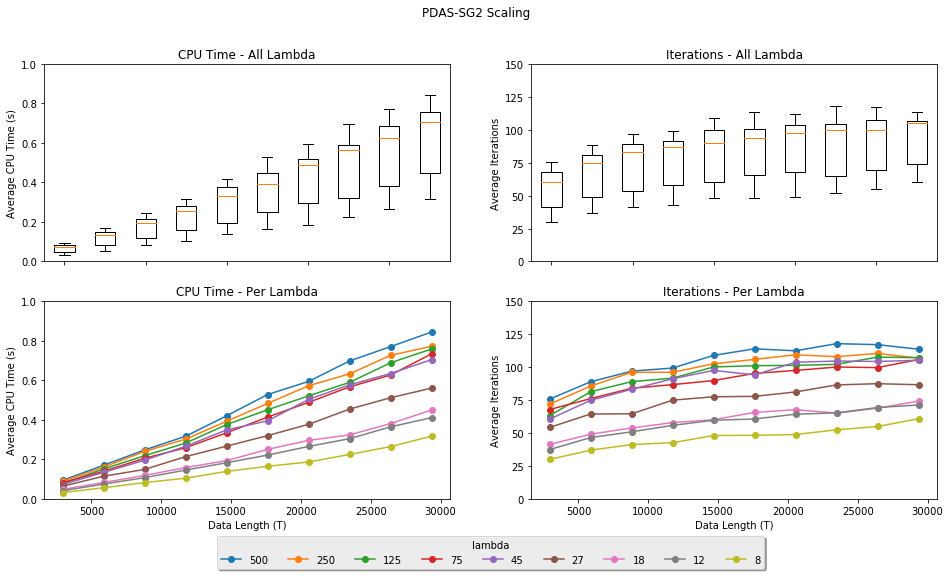

In [295]:
# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8), sharex=False)
ax = axs[0,0]
ax.boxplot(times[:,1:].T, positions=np.arange(1,11, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average CPU Time (s)')
ax.set_ylim((0,1))
ax.set_title('CPU Time - All Lambda')

ax = axs[0,1]
ax.boxplot(iters[:,1:].T, positions=np.arange(1,11, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average Iterations')
ax.set_ylim((0,150))
ax.set_title('Iterations - All Lambda')

ax = axs[1,0]
for ldx, lam in enumerate(lams[1:]):
    ax.plot(sizeData, times[:,ldx+1], marker='o')
ax.set_xlabel('Data Length (T)')
ax.set_ylabel('Average CPU Time (s)')
ax.set_ylim((0,1))
ax.set_title('CPU Time - Per Lambda')
ax.locator_params(nbins=6)

ax = axs[1,1]
for ldx, lam in enumerate(lams[1:]):
    ax.plot(sizeData, iters[:,ldx+1], marker='o')
ax.set_xlabel('Data Length (T)')
ax.set_ylabel('Average Iterations')
ax.set_ylim((0,150))
ax.set_title('Iterations - Per Lambda')
ax.locator_params(nbins=6)
ax.legend(lams[1:], title='lambda', loc='lower center', bbox_to_anchor=(-0.1, -.38),
          ncol=9, fancybox=True, shadow=True)

fig.suptitle('PDAS-SG2 Scaling')

#fig.tight_layout()
plt.show()

In [149]:
time_outlier = times[4,0]
iter_outlier = iters[4,0]

In [178]:
ws_times = np.zeros([10, len(lams)])
ws_iters = np.zeros([10, len(lams)])
sizeData = np.arange(1,11) * T
for signal in signals:
    for ndx in np.arange(1,11):
        target = np.tile(signal, ndx)
        warm_start = np.tile(signal, ndx)
        for ldx, lam in enumerate(lams):
            primal, dual, results, conv =  primal_dual.lagrangian_l1tf(
                target, lam, solver="active set", warm_start=warm_start, 
                verbose=False, record=True, safeguard=True)
            warm_start = results[0]
            ws_iters[ndx-1, ldx] += results[1].shape[0]
            ws_times[ndx-1, ldx] += results[1][-1,-1]
ws_times = ws_times / len(signals)
ws_iters = ws_iters / len(signals)

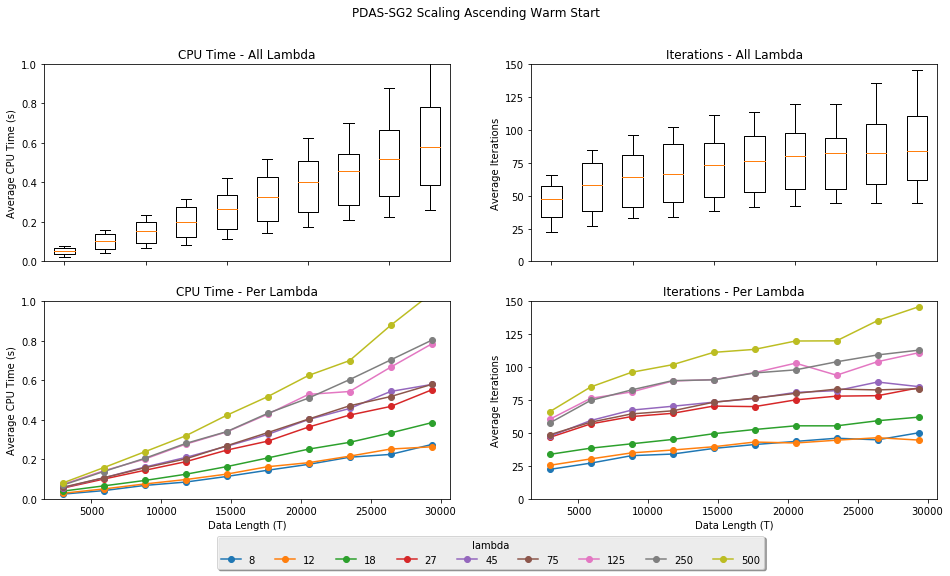

In [299]:
# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8), sharex=False)
ax = axs[0,0]
ax.boxplot(ws_times[:,1:].T, positions=np.arange(1,11, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average CPU Time (s)')
ax.set_ylim((0,1))
ax.set_title('CPU Time - All Lambda')

ax = axs[0,1]
ax.boxplot(ws_iters[:,1:].T, positions=np.arange(1,11, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average Iterations')
ax.set_ylim((0,150))
ax.set_title('Iterations - All Lambda')

ax = axs[1,0]
for ldx, lam in enumerate(lams[1:]):
    ax.plot(sizeData, ws_times[:,ldx+1], marker='o')
ax.set_xlabel('Data Length (T)')
ax.set_ylabel('Average CPU Time (s)')
ax.set_ylim((0,1))
ax.set_title('CPU Time - Per Lambda')
ax.locator_params(nbins=6)

ax = axs[1,1]
for ldx, lam in enumerate(lams[1:]):
    ax.plot(sizeData, ws_iters[:,ldx+1], marker='o')
ax.set_xlabel('Data Length (T)')
ax.set_ylabel('Average Iterations')
ax.set_ylim((0,150))
ax.set_title('Iterations - Per Lambda')
ax.locator_params(nbins=6)
ax.legend(lams[-1:0:-1], title='lambda', loc='lower center', bbox_to_anchor=(-0.1, -.38),
          ncol=9, fancybox=True, shadow=True)

fig.suptitle('PDAS-SG2 Scaling Ascending Warm Start')

#fig.tight_layout()
plt.show()

In [220]:
lams = lams[-1::-1]

In [182]:
ws2_times = np.zeros([10, len(lams)])
ws2_iters = np.zeros([10, len(lams)])
sizeData = np.arange(1,11) * T
for signal in signals:
    for ndx in np.arange(1,11):
        target = np.tile(signal, ndx)
        warm_start = np.tile(signal, ndx)
        for ldx, lam in enumerate(lams):
            primal, dual, results, conv =  primal_dual.lagrangian_l1tf(
                target, lam, solver="active set", warm_start=warm_start, 
                verbose=False, record=True, safeguard=True)
            warm_start = results[0]
            ws2_iters[ndx-1, ldx] += results[1].shape[0]
            ws2_times[ndx-1, ldx] += results[1][-1,-1]
ws2_times = ws2_times / len(signals)
ws2_iters = ws2_iters / len(signals)

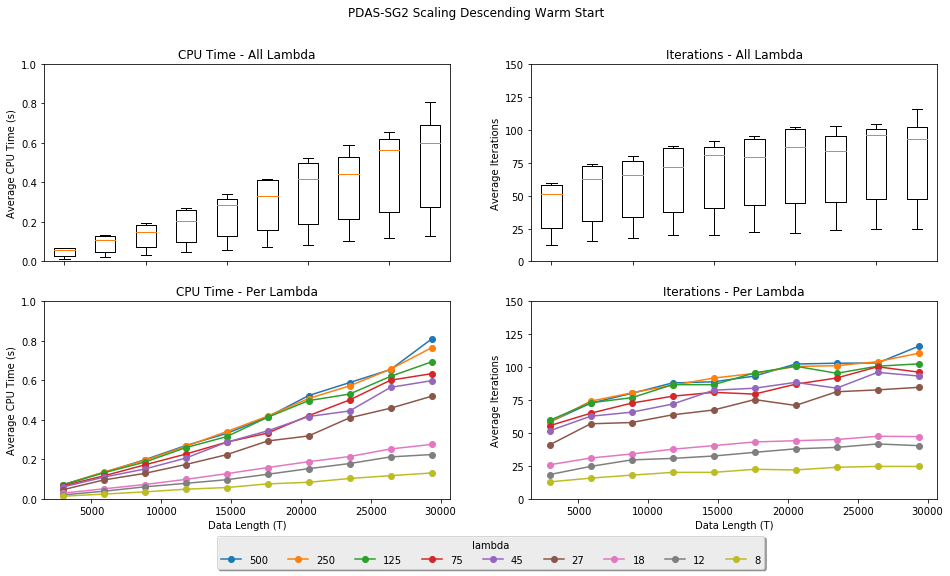

In [300]:
# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8), sharex=False)
ax = axs[0,0]
ax.boxplot(ws2_times[:,1:].T, positions=np.arange(1,11, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average CPU Time (s)')
ax.set_ylim((0,1))
ax.set_title('CPU Time - All Lambda')

ax = axs[0,1]
ax.boxplot(ws2_iters[:,1:].T, positions=np.arange(1,11, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average Iterations')
ax.set_ylim((0,150))
ax.set_title('Iterations - All Lambda')

ax = axs[1,0]
for ldx, lam in enumerate(lams[1:]):
    ax.plot(sizeData, ws2_times[:,ldx+1], marker='o')
ax.set_xlabel('Data Length (T)')
ax.set_ylabel('Average CPU Time (s)')
ax.set_ylim((0,1))
ax.set_title('CPU Time - Per Lambda')
ax.locator_params(nbins=6)

ax = axs[1,1]
for ldx, lam in enumerate(lams[1:]):
    ax.plot(sizeData, ws2_iters[:,ldx+1], marker='o')
ax.set_xlabel('Data Length (T)')
ax.set_ylabel('Average Iterations')
ax.set_ylim((0,150))
ax.set_title('Iterations - Per Lambda')
ax.locator_params(nbins=6)
ax.legend(lams[1:], title='lambda', loc='lower center', bbox_to_anchor=(-0.1, -.38),
          ncol=9, fancybox=True, shadow=True)

fig.suptitle('PDAS-SG2 Scaling Descending Warm Start')

#fig.tight_layout()
plt.show()

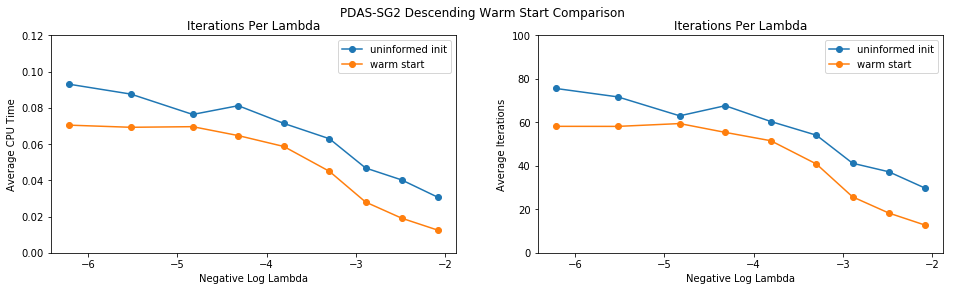

In [320]:
# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,4), sharex=False)
ax = axs[0]
ax.plot(-1 * np.log(lams[1:]), times[0,1:], marker='o')
ax.plot(-1 * np.log(lams[1:]), ws2_times[0,1:], marker='o')
ax.set_xlabel('Negative Log Lambda')
ax.set_ylabel('Average CPU Time')
ax.set_ylim((0,.12))
ax.set_title('Iterations Per Lambda')
ax.locator_params(nbins=6)
ax.legend(["uninformed init", "warm start"])

ax = axs[1]
ax.plot(-1 * np.log(lams[1:]), iters[0,1:], marker='o')
ax.plot(-1 * np.log(lams[1:]), ws2_iters[0,1:], marker='o')
ax.set_xlabel('Negative Log Lambda')
ax.set_ylabel('Average Iterations')
ax.set_ylim((0,100))
ax.set_title('Iterations Per Lambda')
ax.locator_params(nbins=6)
ax.legend(["uninformed init", "warm start"])

fig.suptitle('PDAS-SG2 Descending Warm Start Comparison')

#fig.tight_layout()
plt.show()

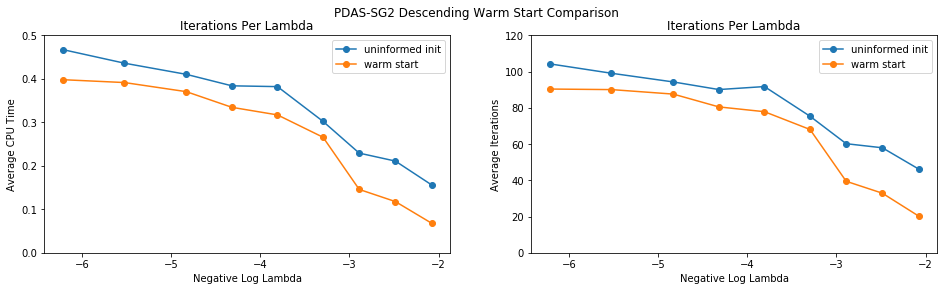

In [326]:
# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,4), sharex=False)
ax = axs[0]
ax.plot(-1 * np.log(lams[1:]), np.mean(times[:,1:], axis=0), marker='o')
ax.plot(-1 * np.log(lams[1:]), np.mean(ws2_times[:,1:],axis=0), marker='o')
ax.set_xlabel('Negative Log Lambda')
ax.set_ylabel('Average CPU Time')
ax.set_ylim((0,.5))
ax.set_title('Iterations Per Lambda')
ax.locator_params(nbins=6)
ax.legend(["uninformed init", "warm start"])

ax = axs[1]
ax.plot(-1 * np.log(lams[1:]), np.mean(iters[:,1:],axis=0), marker='o')
ax.plot(-1 * np.log(lams[1:]), np.mean(ws2_iters[:,1:], axis=0), marker='o')
ax.set_xlabel('Negative Log Lambda')
ax.set_ylabel('Average Iterations')
ax.set_ylim((0,120))
ax.set_title('Iterations Per Lambda')
ax.locator_params(nbins=6)
ax.legend(["uninformed init", "warm start"])

fig.suptitle('PDAS-SG2 Descending Warm Start Comparison')

#fig.tight_layout()
plt.show()

### Control lambda by problem size

### Test Zhengs' Implementations Head-To-Head 

In [334]:
#safe_times = np.zeros([10, len(lams)])
#safe_iters = np.zeros([10, len(lams)])
pdas_times = np.zeros([10, len(lams)])
pdas_iters = np.zeros([10, len(lams)])
my_times = np.zeros([10, len(lams)])
my_iters = np.zeros([10, len(lams)])
sizeData = np.arange(1,11) * T
signal = signals[0,:]
for ndx in np.arange(1,4):
    target = np.tile(signal, ndx)
    prob = tf.TF(target[:, np.newaxis], lam, order=2)
    prob.silence = True
    warm_start = np.tile(signal, ndx)
    #safe = tf.TFsafeG(target[:, np.newaxis], lam, order=2)
    #safe.silence = True
    for ldx, lam in enumerate(lams):
        prob.lam = lam
        prob.pdas()
        pdas_iters[ndx-1, ldx] = prob.info['iter']
        pdas_times[ndx-1, ldx] = prob.info['time']
        primal, dual, results, conv =  primal_dual.lagrangian_l1tf(
                target, lam, solver="active set", warm_start=warm_start, 
                verbose=False, record=True, safeguard=True)
        warm_start = results[0]
        my_iters[ndx-1, ldx] = results[1].shape[0]
        my_times[ndx-1, ldx] = results[1][-1,-1]
        #safe.lam = lam
        #safe.pdas()
        #safe_iters[ndx-1, ldx] = safe.info['iter']
        #safe_times[ndx-1, ldx] = safe.info['time']
        

---------------------------------------------------
  IT       OBJ  #VIO     |VIO| |neg| |act| |pos|
---------------------------------------------------
---------------------------------------------------
  IT       OBJ  #VIO     |VIO| |neg| |act| |pos|
---------------------------------------------------
---------------------------------------------------
  IT       OBJ  #VIO     |VIO| |neg| |act| |pos|
---------------------------------------------------
---------------------------------------------------
  IT       OBJ  #VIO     |VIO| |neg| |act| |pos|
---------------------------------------------------
---------------------------------------------------
  IT       OBJ  #VIO     |VIO| |neg| |act| |pos|
---------------------------------------------------
---------------------------------------------------
  IT       OBJ  #VIO     |VIO| |neg| |act| |pos|
---------------------------------------------------
---------------------------------------------------
  IT       OBJ  #VIO     |VIO|

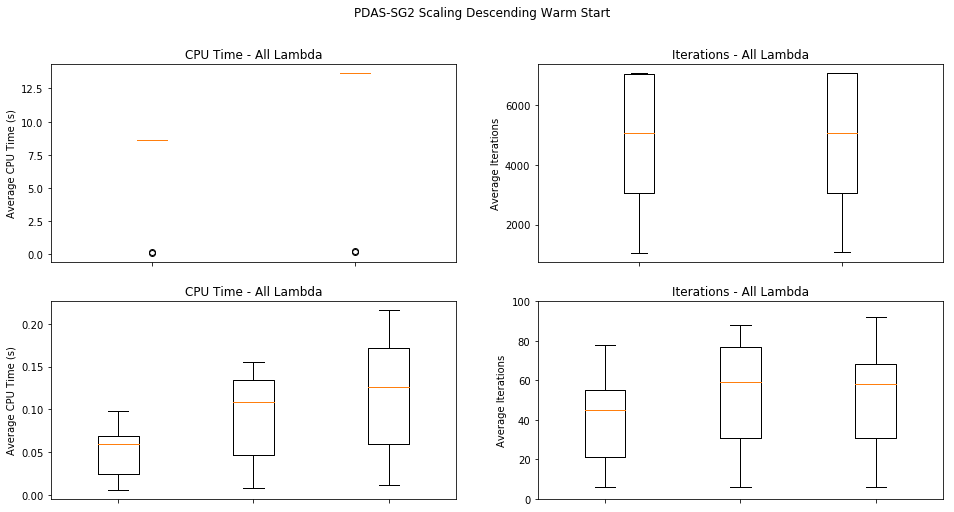

In [354]:
# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8), sharex=False)
ax = axs[0,0]
ax.boxplot(pdas_times[1:3,1:].T, positions=np.arange(2,4, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average CPU Time (s)')
#ax.set_ylim((0,1))
ax.set_title('CPU Time - All Lambda')

ax = axs[0,1]
ax.boxplot(pdas_iters[1:3,1:].T, positions=np.arange(2,4, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average Iterations')
#ax.set_ylim((0,150))
ax.set_title('Iterations - All Lambda')

ax = axs[1,0]
ax.boxplot(my_times[:3,1:].T, positions=np.arange(1,4, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average CPU Time (s)')
#ax.set_ylim((0,1))
ax.set_title('CPU Time - All Lambda')

ax = axs[1,1]
ax.boxplot(my_iters[:3,1:].T, positions=np.arange(1,4, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average Iterations')
ax.set_ylim((0,100))
ax.set_title('Iterations - All Lambda')

fig.suptitle('PDAS-SG2 Scaling Descending Warm Start')

#fig.tight_layout()
plt.show()

In [371]:
lams.sort()

In [372]:
pdfo_times = np.zeros([10, len(lams)])
pdfo_iters = np.zeros([10, len(lams)])
sizeData = np.arange(1,11) * T
signal = signals[0,:]
for ndx in np.arange(1,4):
    target = np.tile(signal, ndx)
    warm_start = np.tile(signal, ndx)
    for ldx, lam in enumerate(lams):
        primal, dual, results, conv =  primal_dual.lagrangian_l1tf(
                target, lam, solver="first order", warm_start=warm_start, 
                tol=1e-2, verbose=False, record=True, safeguard=True)
        warm_start = (primal, dual)
        pdfo_iters[ndx-1, ldx] = results[0].shape[0]
        pdfo_times[ndx-1, ldx] = results[0][-1,-1]

/Users/ikinsella/devel/voltagedenoising/primal_dual.py:317: RuntimeWarning: divide by zero encountered in true_divide
  # Evaluate Progress


NameError: name 'pdfo_times' is not defined

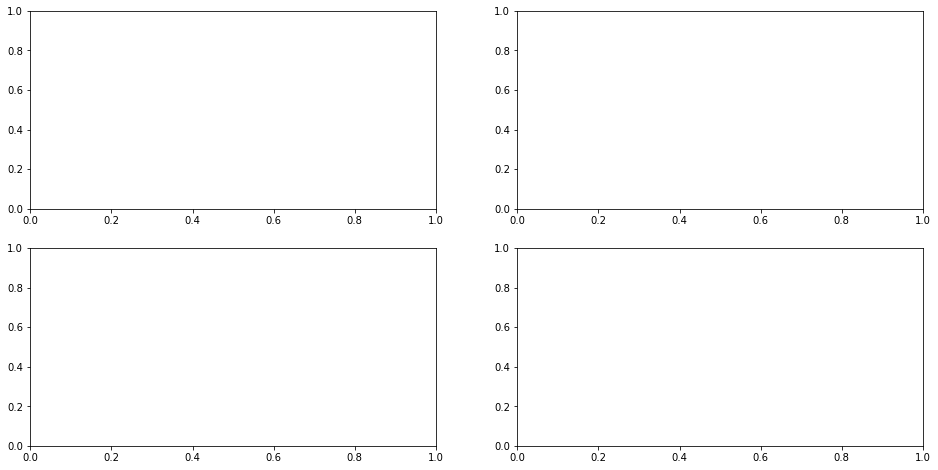

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8), sharex=False)
ax = axs[0,0]
ax.boxplot(pdfo_times[1:3,1:].T, positions=np.arange(2,4, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average CPU Time (s)')
#ax.set_ylim((0,1))
ax.set_title('CPU Time - All Lambda')

ax = axs[0,1]
ax.boxplot(pdfo_iters[1:3,1:].T, positions=np.arange(2,4, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average Iterations')
#ax.set_ylim((0,150))
ax.set_title('Iterations - All Lambda')

ax = axs[1,0]
ax.boxplot(pdfo_times[:3,1:].T, positions=np.arange(1,4, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average CPU Time (s)')
#ax.set_ylim((0,1))
ax.set_title('CPU Time - All Lambda')

ax = axs[1,1]
ax.boxplot(pdfo_iters[:3,1:].T, positions=np.arange(1,4, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average Iterations')
ax.set_ylim((0,100))
ax.set_title('Iterations - All Lambda')

fig.suptitle('PDAS-SG2 Scaling Descending Warm Start')

#fig.tight_layout()
plt.show()

# Normalize Signals

In [8]:
idx = np.random.randint(0, N)
y = signals[idx,:].copy()

# Cython implementations

In [9]:
from pdas_l1tf.pdas_sg2_C.c_pdas_sg2 import active_set
from l1_trend_filter.l1_tf_C.c_l1_tf import l1_tf
from timeit import timeit

/Users/ikinsella/miniconda3/envs/caiman/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.4 of module 'c_pdas_sg2' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/ikinsella/miniconda3/envs/caiman/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: builtins.type size changed, may indicate binary incompatibility. Expected 864, got 824
  return f(*args, **kwds)


In [10]:
from timeit import timeit

In [11]:
x_hat, z_hat = active_set(y, 500, 1000, 1)

In [12]:
pdas_signal = np.array(x_hat)

In [13]:
x_hat = l1_tf(y, 500, False, 200, 1)

In [14]:
ipm_signal = np.array(x_hat)

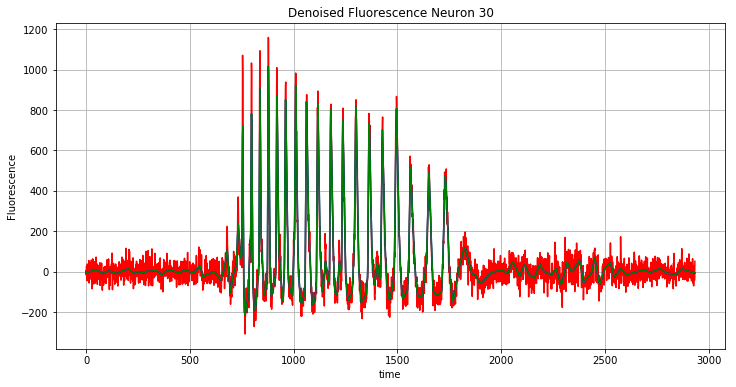

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(T), y, 'r')
ax.plot(np.arange(T), ipm_signal, 'b')
ax.plot(np.arange(T), pdas_signal, 'g')


ax.set(xlabel='time', ylabel='Fluorescence',
       title='Denoised Fluorescence Neuron {}'.format(idx))
ax.grid()

plt.show()

# Time Trial

In [16]:
lams = [500, 400, 300, 200, 100, 50, 25, 1]

In [21]:
ipm_times = np.zeros([10, len(lams)])
pdas_times = np.zeros([10, len(lams)])
sizeData = np.arange(1,11) * T
for signal in signals:
    for ndx in np.arange(1,11):
        target = np.tile(signal, ndx)
        for ldx, lam in enumerate(lams):
            def time_ipm():
                x_hat = l1_tf(target, lam, False, 500, 0)
            def time_pdas():
                x_hat, z_hat = active_set(target, lam, 500, 0)
            ipm_times[ndx-1, ldx] += timeit(time_ipm, number=10)/10
            pdas_times[ndx-1, ldx] += timeit(time_pdas, number=10)/10
ipm_times = ipm_times / len(signals)
pdas_times = pdas_times / len(signals)

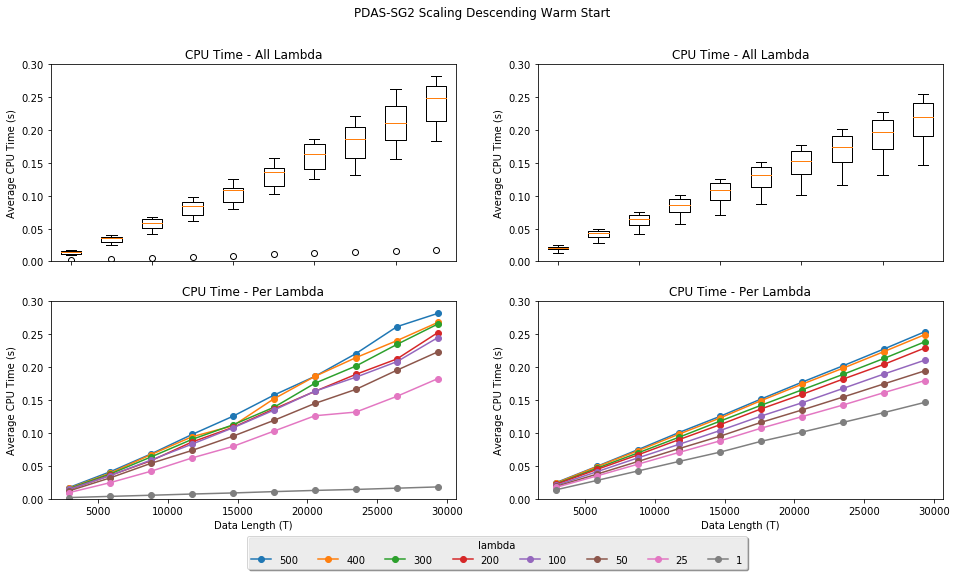

In [56]:
# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8), sharex=False)
ax = axs[0,0]
ax.boxplot(pdas_times.T, positions=np.arange(1,11, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average CPU Time (s)')
ax.set_ylim((0,.3))
ax.set_title('CPU Time - All Lambda')

ax = axs[0,1]
ax.boxplot(ipm_times.T, positions=np.arange(1,11, dtype='int'))
plt.setp(ax.get_xticklabels(), visible=False)
ax.locator_params(nbins=6)
ax.set_ylabel('Average CPU Time (s)')
ax.set_ylim((0,.3))
ax.set_title('CPU Time - All Lambda')

ax = axs[1,0]
for ldx, lam in enumerate(lams):
    ax.plot(sizeData, pdas_times[:,ldx], marker='o')
ax.set_xlabel('Data Length (T)')
ax.set_ylabel('Average CPU Time (s)')
ax.set_ylim((0,.3))
ax.set_title('CPU Time - Per Lambda')
ax.locator_params(nbins=6)

ax = axs[1,1]
for ldx, lam in enumerate(lams):
    ax.plot(sizeData, ipm_times[:,ldx], marker='o')
ax.set_xlabel('Data Length (T)')
ax.set_ylabel('Average CPU Time (s)')
ax.set_ylim((0,.3))
ax.set_title('CPU Time - Per Lambda')
ax.locator_params(nbins=6)

ax.legend(lams, title='lambda', loc='lower center', bbox_to_anchor=(-0.1, -.38),
          ncol=9, fancybox=True, shadow=True)

fig.suptitle('PDAS-SG2 Scaling Descending Warm Start')

#fig.tight_layout()
plt.show()

# Combine To Demonstrate Warm Starting

In [53]:
import l1tf.solvers.pdas as pdas
import l1tf.solvers.ipm as ipm
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
def time_ipm():
    x_hat = ipm.l1_tf(y, 100, False, 500, 0)
def time_pdas():
    x_hat, z_hat = pdas.active_set(y, 100, 500, 0)

In [49]:
timeit(time_ipm, number=10)

0.2032195520005189

In [50]:
timeit(time_pdas, number=10)

0.1821838879986899

In [54]:
pdas.solve

AttributeError: module 'l1tf.solvers.pdas' has no attribute 'solve'